# **Project: Advance Lane Finding** 

In this project, the goal is to write a software pipeline to identify the lane boundaries in video from a front-facing camera on a car.The camera calibration images, test road images, and videos are available in this repository. Your job is to take what you've learned in this lesson and write a great lane-finding pipeline!  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images).
For this project, you need to complete the following steps:

First, compute the camera calibration matrix and distortion coefficients given a set of chessboard images (in the camera_cal folder in the repository).

Next, for a series of test images (in the test_images folder in the repository):

    - Apply the distortion correction to the raw image.
    - Use color transforms, gradients, etc., to create a thresholded binary image.
    - Apply a perspective transform to rectify binary image ("birds-eye view").
    - Detect lane pixels and fit to find lane boundary.
    - Determine curvature of the lane and vehicle position with respect to center.
    - Warp the detected lane boundaries back onto the original image.
    - Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

Once you have implemented a successful pipeline on the test images, you will run your algorithm on a video. In the case of the video, you must search for the lane lines in the first few frames, and, once you have a high-confidence detection, use that information to track the position and curvature of the lines from frame to frame.

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import re
import glob
%matplotlib inline
print('Import Complete!')

Import Complete!


### Camera Calibration

Find and Draw Chessboard corners.

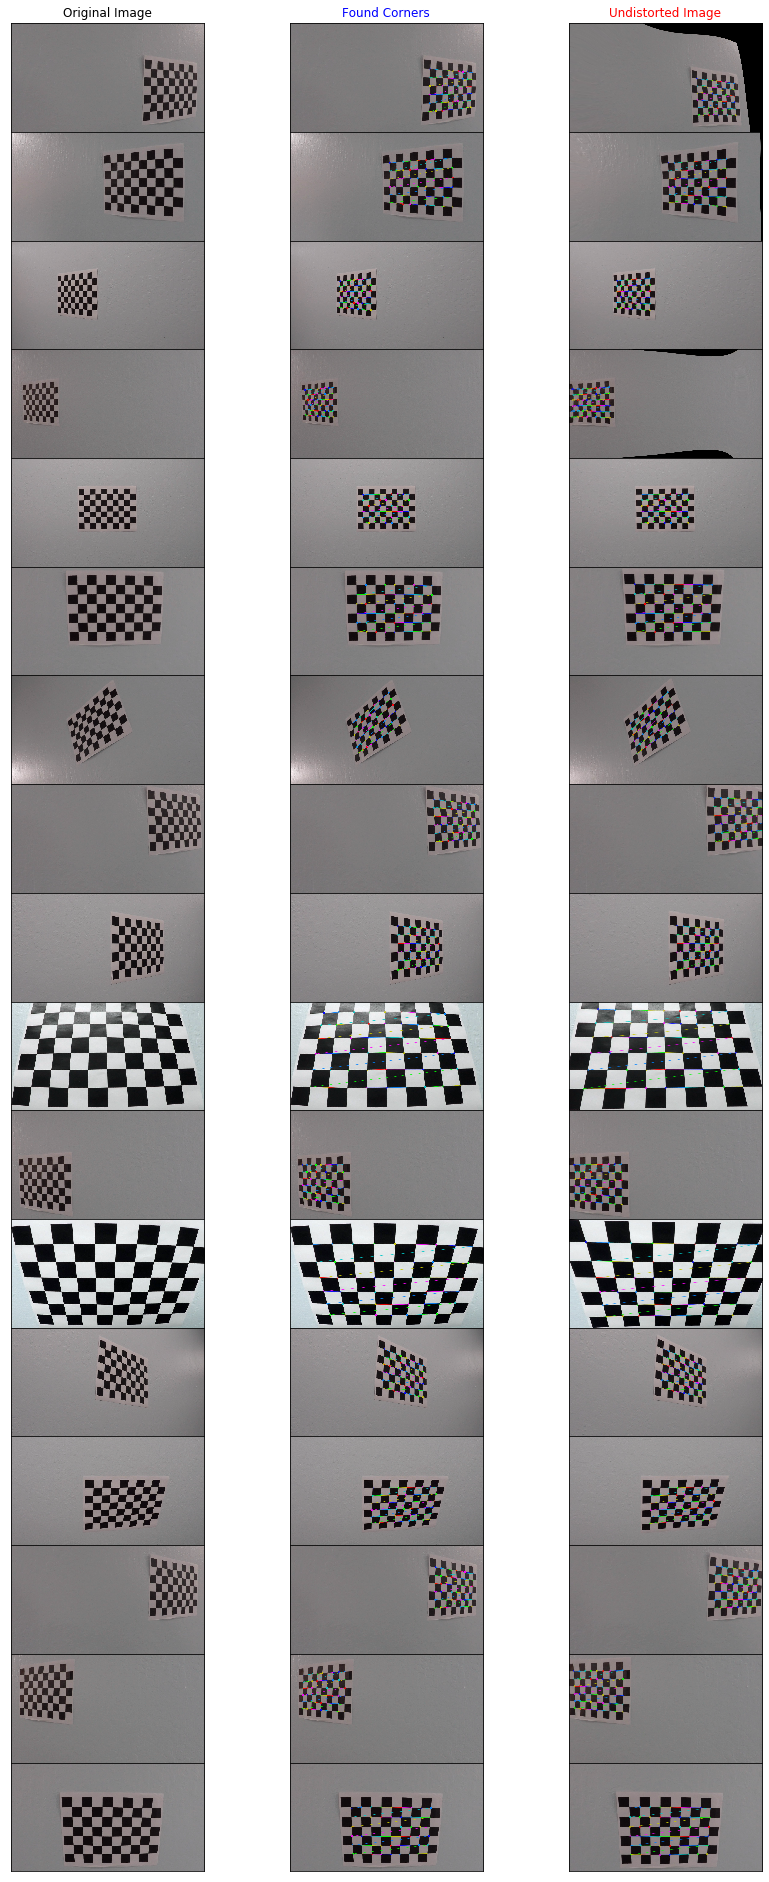

In [3]:
# These Arrays will be used to store object and image points
objpts = [] # 3D points in realworld Space
imgpts = [] # 2D points in Image space


# Prepare np(numpy) array for points like (0,0,0), (1,0,0),(1,1,0),....(7,5,0)
objp = np.zeros((6*9,3), np.float32)

# Lets use np's mgrig to initialize the array

objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # T is for Transpose

# Making the list of files
images = os.listdir('camera_cal')
# print(images) # Just to verify what has been added to images

#Setup Plot
fig = plt.figure(figsize=(15,len(images)*2))
w_ratios = [1 for n in range(3)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 3, wspace= 0, hspace= 0 , width_ratios= w_ratios, height_ratios= h_ratios)
i =0

# Loop through images and find chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread('camera_cal/'+fname)
    img_cp = np.copy(img)
    img_size = (img.shape[1],img.shape[0])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find Chessboard Corners
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
    # print("corners: ", corners.shape, "\n", corners)
    # If found, append arrays for obj and img pts
    if ret == True:
        imgpts.append(corners)
        objpts.append(objp)
        
        # Draw corners, Undistort images and save images in a Premade Folder
        cv2.drawChessboardCorners(img_cp,(corners.shape[1],corners.shape[0]),corners,ret) 
        
        #Camera Calibration
        ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpts, imgpts, img_size,None,None)
        
        # Undistort Images
        img_undistort = cv2.undistort(img_cp, mtx, dist, None, mtx)
        
        # next image
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img)
        if i==0:
            ax.set_title('Original Image', color = 'black' )
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img_cp)
        if i==1:
            ax.set_title('Found Corners', color = 'blue' )
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img_undistort)
        if i==2:
            ax.set_title('Undistorted Image', color = 'red' )
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
       #plt.imsave('./output_images/ChessboardCorners/FoundCorners/'+fname,img_cp)
       #plt.imsave('./output_images/ChessboardCorners/Undistorted/'+fname,img_undistort)
       #fig.savefig('output_images/ChessboardCorners/ChessboardCorners_Draw_Undistort.jpg')

  #  else:
  #      # next image
  #      ax = plt.Subplot(fig, grid[i])
  #      ax.set_title('Corners Not Found! %s'%(fname))
  #      ax.set_xticks([])
  #      ax.set_yticks([])
  #      fig.add_subplot(ax)
  #      i += 3
#print("corners: ", corners.shape, "\n", corners)
plt.show()

<Figure size 864x1296 with 0 Axes>

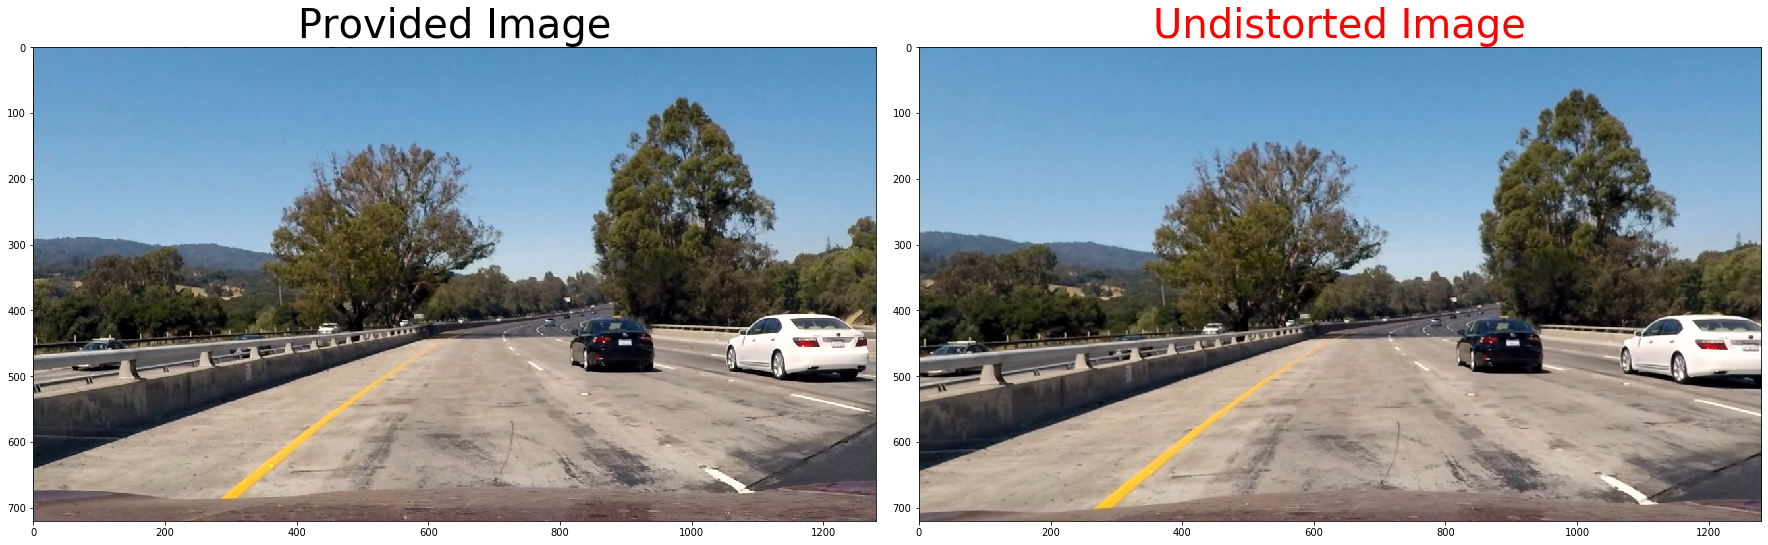

In [48]:
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)
    
# Make a list of test images
filepath = "test_images"
images = os.listdir('test_images')
#print(images[1])
# Setup plot
fig = plt.figure(figsize=(12, len(images)*3))
w_ratios = [1 for n in range(2)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 2, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = 0

# loop through and display test images and undististort them
for i, fname in enumerate(images):
    #print('test_images/'+fname)
    img = cv2.imread(filepath+'/'+fname)
    img_cp = np.copy(img)
    img_cp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_cp_size = (img_cp.shape[1], img_cp.shape[0])
        
#Display original image and undistorted image side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_cp, cmap= 'gray')
ax1.set_title('Provided Image', fontsize=40, color = 'k')
ax2.imshow(img_undist, cmap='gray')
ax2.set_title('Undistorted Image', fontsize=40, color = 'r')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [49]:
# print calibration matrix and distortion coefficients 
print('The Calibration Matrix is:\n {},\n\n Distortion Coefficients are:\n {}'.format(mtx, dist))

The Calibration Matrix is:
 [[1.15777942e+03 0.00000000e+00 6.67111050e+02]
 [0.00000000e+00 1.15282305e+03 3.86129068e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]],

 Distortion Coefficients are:
 [[-0.24688833 -0.02372817 -0.00109843  0.00035105 -0.00259134]]


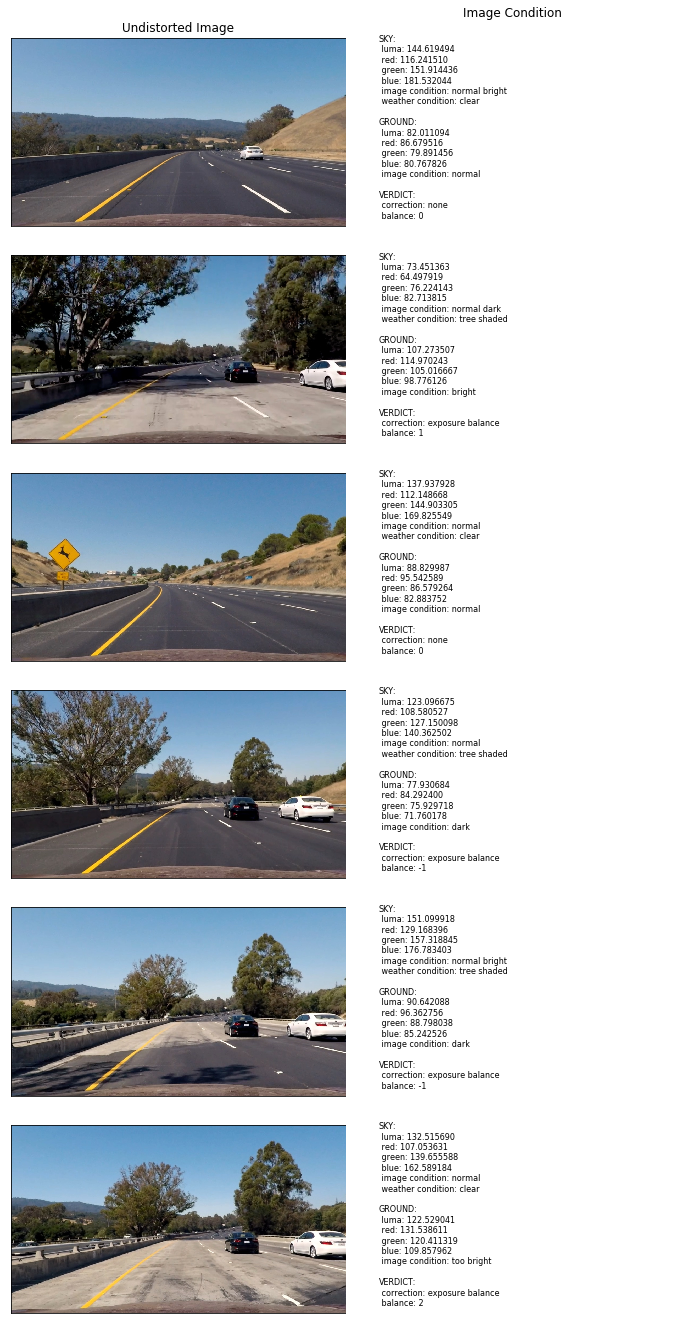

In [52]:
# Current pipeline
# - distortion correction
# - condition detection
def condition_detect(image):
    # setup inRange to mask off everything except white and yellow
    yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    x, y = yuv.shape[1], yuv.shape[0]

    skyl = np.average(yuv[0:int(y/2),0:x,0])
    skyr = np.average(image[0:int(y/2),0:x,0])
    skyg = np.average(image[0:int(y/2),0:x,1])
    skyb = np.average(image[0:int(y/2),0:x,2])
    sky = {'l':skyl,'r':skyr,'g':skyg,'b':skyb}
    if skyl > 160:
        sky['iq'] = 'overexposed'
    elif skyl < 50:
        sky['iq'] = 'underexposed'
    elif skyl > 143:
        sky['iq'] = 'normal bright'
    elif skyl < 113:
        sky['iq'] = 'normal dark'
    else:
        sky['iq'] = 'normal'
    if skyl > 128:
        if skyb > skyl:
            if skyr > 128 and skyg > 128:
                if (skyg-skyr) > 20.0:
                    sky['wc'] = 'tree shaded'
                else:
                    sky['wc'] = 'cloudy'
            else:
                sky['wc'] = 'clear'
        else:
            sky['wc'] = 'unknown SKYL>128'
    else:
        if skyg > skyb:
            sky['wc'] = 'surrounded by trees'
        elif skyb > skyl:
            if (skyg-skyr) > 10.0:
                sky['wc'] = 'tree shaded'
            else:
                sky['wc'] = 'very cloudy or under overpass'
        else:
            sky['wc'] = 'unknown'
    
    groundl = np.average(yuv[int(y/2):y,0:x,0])
    groundr = np.average(image[int(y/2):y,0:x,0])
    groundg = np.average(image[int(y/2):y,0:x,1])
    groundb = np.average(image[int(y/2):y,0:x,2])
    ground = {'l':groundl,'r':groundr,'g':groundg,'b':groundb}
    
    ground['correction'] = 'none'
    ground['vf'] = groundl/10
    ground['v'] = 0
    if groundl > 160:
        ground['iq'] = 'overexposed'
        ground['correction'] = 'exposure balance'
        ground['v'] = 3
    elif groundl < 50:
        ground['iq'] = 'underexposed'
        ground['correction'] = 'exposure balance'
        ground['v'] = -3
    elif groundl > skyl:
        if groundl > 110:
            ground['iq'] = 'too bright'
            ground['correction'] = 'exposure balance'
            if sky['wc'] == 'surrounded by trees' and abs(ground['l']-sky['l'])>9.0 and sky['l']>100.0:
                ground['v'] = 0
                ground['iq'] = 'bright/high contras'
                ground['correction'] = 'none'
            else:
                ground['v'] = 2
        else:
            ground['iq'] = 'bright'
            ground['correction'] = 'exposure balance'
            ground['v'] = 1
    else:
        if sky['wc'] == 'clear' or sky['wc'] == 'cloudy':
            if groundl > 110:
                ground['iq'] = 'too bright'
                ground['correction'] = 'exposure balance'
                ground['v'] = 2
            elif groundl > 90:
                ground['iq'] = 'bright'
                ground['correction'] = 'exposure balance'
                ground['v'] = 1
            elif groundl < 60:
                ground['iq'] = 'too dark'
                ground['correction'] = 'exposure balance'
                ground['v'] = -2
            elif groundl < 80:
                ground['iq'] = 'dark'
                ground['correction'] = 'exposure balance'
                ground['v'] = -1
            else:
                ground['iq'] = 'normal'
        else:
            ground['iq'] = 'dark'
            ground['correction'] = 'exposure balance'
            ground['v'] = -1

    
    #print("condition: sky", sky, "ground",ground)    
    return sky, ground, image

def process_image(img):
    return condition_detect(cv2.undistort(img, mtx, dist, None, mtx))

# Make a list of test images
filepath = "test_images/"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'*.jpg')

# Setup plot
fig = plt.figure(figsize=(12, len(images)*4))
w_ratios = [1 for n in range(2)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 2, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = int(0)

# loop through and display test images and undististort them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # process image
        sky, ground, img2 = process_image(img)
        
        # next image
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img2)
        if i==0:
            ax.set_title('Undistorted Image')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1

        ax = plt.Subplot(fig, grid[i])
        ax.text(0.1,0.1,'SKY:\n luma: %f\n red: %f\n green: %f\n blue: %f\n image condition: %s\n weather condition: %s\n\nGROUND:\n luma: %f\n red: %f\n green: %f\n blue: %f\n image condition: %s\n\nVERDICT:\n correction: %s\n balance: %d'%(sky['l'], sky['r'], sky['g'], sky['b'], sky['iq'], sky['wc'], ground['l'], ground['r'], ground['g'], ground['b'], ground['iq'], ground['correction'], ground['v']), fontsize=8)
        if i==1:
            ax.set_title('Image Condition')
        ax.set_xticks([])
        ax.set_yticks([])
        for sp in ax.spines.values():
            sp.set_visible(False)

        fig.add_subplot(ax)
        i += 1
            

plt.show()

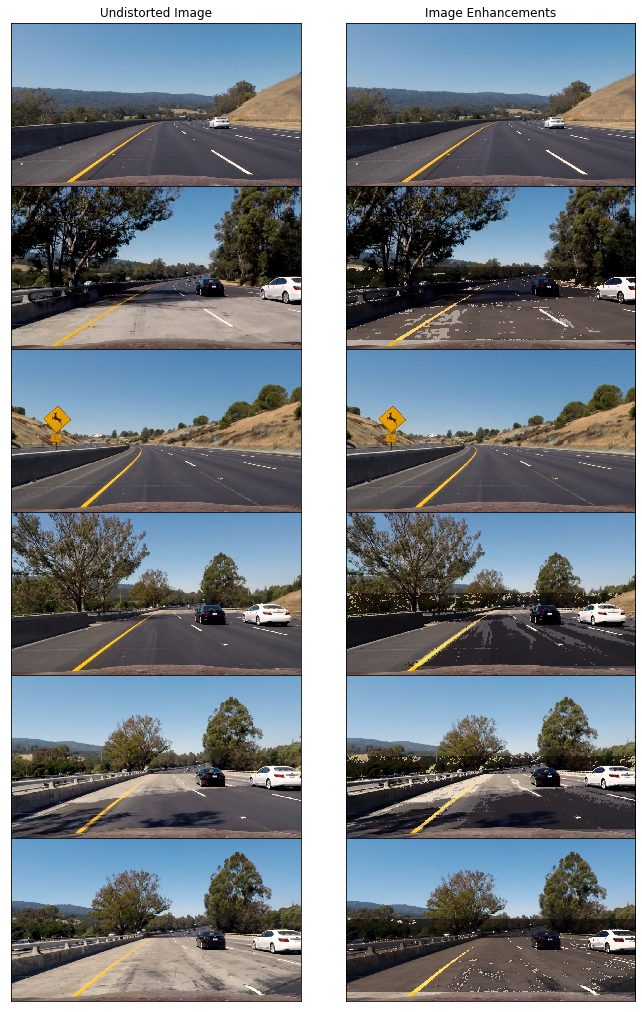

In [57]:
# Python 3 has support for cool math symbols.
def miximg(img1, img2, α=0.8, β=1., λ=0.):
    """
    `img2` is the output of the sobel functions,
    should be a blank image (all black) with lines drawn on it.

    `img1` should be the image before any processing.
    
    The result image is computed as follows:    
    img1 * α + img2 * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(img1.astype(np.uint8), α, img2.astype(np.uint8), β, λ)

def balance_exposure(sky, ground, image):
    # setup
    x, y = image.shape[1], image.shape[0]
    r = image[int(y//2):y,0:x,0]
    g = image[int(y//2):y,0:x,1]
    b = image[int(y//2):y,0:x,2]
    yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    yo = yuv[int(y//2):y,0:x,0].astype(np.float32)
    yc = (yo//ground['vf'])*8.0
    lymask = np.copy(yc)
    lymask[lymask>255] = 255
    if ground['v'] == -1:
        lymask[(lymask>255.0)] = 255.0
        lymask[(r>ground['g'])&(g>ground['g'])] = 0
    elif ground['v'] > -3 and ground['v'] < 3 and sky['l']>70.0:
        lymask[(lymask>255.0)] = 255.0
        lymask[(lymask>128.0)] = 0.0
    elif ground['v'] == 3:
        lymask[(lymask>255.0)] = 255.0
        #lymask[(lymask<128.0)|(lymask>200)] = 0
        #lymask[(lymask<64.0)|(lymask>200)] = 0
    else:
        lymask[(lymask>224.0)] = 0.0
    uymask = np.copy(yc)*0
    yc -= lymask

    if sky['wc'] == 'surrounded by trees':
        if ground['v'] > 0 and ground['v'] < 3:
            if ground['b'] < ground['l']:
                #yc[(b>ground['b'])&(yo>160+(ground['v']*20))] = 242.0
                yc[(b>ground['b'])&(yo>200+(ground['v']*20))] = 242.0
            else:
                yc[(b>ground['b'])&(yo>200-(ground['v']*10))] = 242.0
                #yc[(b>ground['b'])&(yo>200)] = 242.0
                #yc[(b>ground['b'])&(b<yo)] = 242.0
        elif ground['v'] == 3:
            yc[(b>254)&(g>254)&(r>254)] = 242.0
            #yc[(b>ground['b'])&(yo>200-(ground['v']*10))] = 242.0
        elif ground['v'] > -3 and ground['v'] < 0:
            yc[(b>ground['b'])&(b<r)] = 242.0
    elif sky['wc'] == 'clear':
        yc[(b>ground['b'])&(yo>180+(ground['v']*20))] = 242.0
        #yc[(b>ground['r'])&(b<r)] = 242.0
    elif sky['wc'] == 'cloudy':
        if ground['v'] == 3:
            yc[(b>254)&(g>254)&(r>254)] = 242.0
        else:
            yc[(b>ground['b'])&(yo>160+(ground['v']*20))] = 242.0
    else:
        yc[(b>ground['b'])&(yo>200+(ground['v']*10))] = 242.0
        #yc[(b>ground['r'])&(b<r)] = 242.0

    if ground['v'] == 2:
        uymask[(b<ground['l'])&(r>ground['l'])&(g>ground['l'])] = 242.0
    elif ground['v'] == 1:
        uymask[(b<ground['r'])&(r>ground['b'])&(g>ground['b'])] = 242.0
    elif ground['v'] == -1:
        uymask[(b<ground['b'])&(r>ground['r'])&(g>ground['g'])] = 242.0
    elif ground['v'] == 3:
        uymask[(b<ground['l'])&(r>ground['l'])&(g>ground['l'])] = 242.0
    elif ground['v'] > -3:
        uymask[(b<ground['b'])&(r>ground['b'])&(g>ground['b'])] = 242.0

    yc = miximg(yc,uymask,1.0,1.0)
    #yc = miximg(yc,(yo//ground['vf'])*8.0,1.0,0.8)
    
    yuv[int(y//2):y,0:x,0] = yc.astype(np.uint8)
    yuv[(y-40):y,0:x,0] = yo[((y//2)-40):(y//2),0:x].astype(np.uint8)
    return sky, ground, cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)

def balance_exposure_temp(sky, ground, image):
    # setup
    x, y = image.shape[1], image.shape[0]
    r = image[int(y//2):y,0:x,0]
    g = image[int(y//2):y,0:x,1]
    b = image[int(y//2):y,0:x,2]
    yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    yo = yuv[int(y//2):y,0:x,0].astype(np.float32)
    yc = (yo//ground['vf'])*8.0
    lymask = np.copy(yc)
    lymask[(lymask>255.0)] = 255.0
    uymask = np.copy(yc)*0
    yc -= lymask
    if ground['v'] == 3:
        yc[(b>254)&(g>254)&(r>254)] = 242.0
    elif ground['v'] == 1:
        yc[(b>ground['b'])&(yo>160+(ground['v']*20))] = 242.0
    else:
        yc[(b>ground['b'])&(yo>210+(ground['v']*10))] = 242.0
    uymask[(b<ground['l'])&(r>ground['l'])&(g>ground['l'])] = 242.0
    yc = miximg(yc,uymask,1.0,1.0)
    yc = miximg(yc,yo,1.0,0.8)
    yc[int((y//72)*70):y,0:x] = 0
    yuv[int(y//2):y,0:x,0] = yc.astype(np.uint8)
    yuv[(y-40):y,0:x,0] = yo[((y//2)-40):(y//2),0:x].astype(np.uint8)
    return sky, ground, cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)



def process_image_stage1(img):
    sky, ground, img = condition_detect(cv2.undistort(img, mtx, dist, None, mtx))
    if ground['v'] == 0:
        img0 = np.copy(img)
    elif sky['wc'] == 'cloudy':
        sky, ground, img0 = balance_exposure_temp(sky, ground, img)
    else:
        sky, ground, img0 = balance_exposure(sky, ground, img)
        
    return sky, ground, img0, img

# Make a list of test images
filepath = "test_images//"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'*.jpg')

# Setup plot
fig = plt.figure(figsize=(12, len(images)*3))
w_ratios = [1 for n in range(2)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 2, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = int(0)

# loop through and display test images and undististort them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # process image
        sky, ground, img0, img = process_image_stage1(img)
        
        # next image
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img)
        #ax.imshow(img2[:,:,0], cmap='gray')
        #ax.text(0.1,0.1,'SKY:\n luma: %f\n red: %f\n green: %f\n blue: %f\n image condition: %s\n weather condition: %s\n\nGROUND:\n luma: %f\n red: %f\n green: %f\n blue: %f\n image condition: %s\n\nVERDICT:\n correction: %s\n balance: %d'%(sky['l'], sky['r'], sky['g'], sky['b'], sky['iq'], sky['wc'], ground['l'], ground['r'], ground['g'], ground['b'], ground['iq'], ground['correction'], ground['v']), fontsize=8)
        if i==0:
            ax.set_title('Undistorted Image')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1

        ax = plt.Subplot(fig, grid[i])
        #ax.imshow(img2[:,:,0], cmap='gray')
        ax.imshow(miximg(img0,img,0.5,0.5))
        if i==1:
            ax.set_title('Image Enhancements')
        ax.set_xticks([])
        ax.set_yticks([])
        #for sp in ax.spines.values():
        #    sp.set_visible(False)

        fig.add_subplot(ax)
        i += 1
            

plt.show()

In [59]:
## Import math module and create some helper functions
## Define a function that masks out everything except for white and yellow colors pixels
def yuv(image):
    # setup inRange to mask off everything except white and yellow
    yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    u = yuv[:,:,1]
    v = yuv[:,:,2]
    ignore_color = np.copy(v)*0
    img = np.dstack((u, ignore_color, v))
    return img
    #lower = np.array([0, 0, 0])
    #upper = np.array([255, 255, 255])
    #mask = cv2.inRange(yuv, lower, upper)
    #return cv2.bitwise_and(yuv, yuv, mask=mask)

def image_only_yellow_white(image):
    # setup inRange to mask off everything except white and yellow
    lower_yellow_white = np.array([140, 140, 64])
    upper_yellow_white = np.array([255, 255, 255])
    mask = cv2.inRange(image, lower_yellow_white, upper_yellow_white)
    return cv2.bitwise_and(image, image, mask=mask)

## Define a function that applies Gaussian Noise kernel
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

## Define a function that applies Canny transform
def canny(img, low_threshold, high_threshold, kernel_size):
    img = image_only_yellow_white(img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur_gray = gaussian_blur(gray, kernel_size)
    return cv2.Canny(blur_gray, low_threshold, high_threshold)

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
def abs_sobel_thresh(img, orient='x', thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
        abs_sobel = np.absolute(sobelx)
    if orient == 'y':
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
        abs_sobel = np.absolute(sobely)
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    ret, binary_output = cv2.threshold(scaled_sobel, thresh[0], thresh[1], cv2.THRESH_BINARY)
    # Return the result
    return binary_output

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # 5) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # 6) Create a binary mask where mag thresholds are met
    ret, mag_binary = cv2.threshold(gradmag, mag_thresh[0], mag_thresh[1], cv2.THRESH_BINARY)
    # 7) Return this mask as your binary_output image
    return mag_binary

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the direction of the gradient
    # 4) Take the absolute value
    with np.errstate(divide='ignore', invalid='ignore'):
        dirout = np.absolute(np.arctan(sobely/sobelx))
        # 5) Create a binary mask where direction thresholds are met
        dir_binary =  np.zeros_like(dirout).astype(np.float32)
        dir_binary[(dirout > thresh[0]) & (dirout < thresh[1])] = 1
        # 6) Return this mask as your binary_output image
    # update nan to number
    np.nan_to_num(dir_binary)
    # make it fit
    dir_binary[(dir_binary>0)|(dir_binary<0)] = 128
    return dir_binary.astype(np.uint8)

# Define a function that thresholds the S-channel of HLS
def hls_s(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    # 2) Apply a threshold to the S channel
    # 3) Return a binary image of threshold result
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s = hls[:,:,2]
    retval, s_binary = cv2.threshold(s.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
    return s_binary

# Define a function that thresholds the S-channel of HLS
def hls_h(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    # 2) Apply a threshold to the S channel
    # 3) Return a binary image of threshold result
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h = hls[:,:,0]
    retval, h_binary = cv2.threshold(h.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
    return h_binary


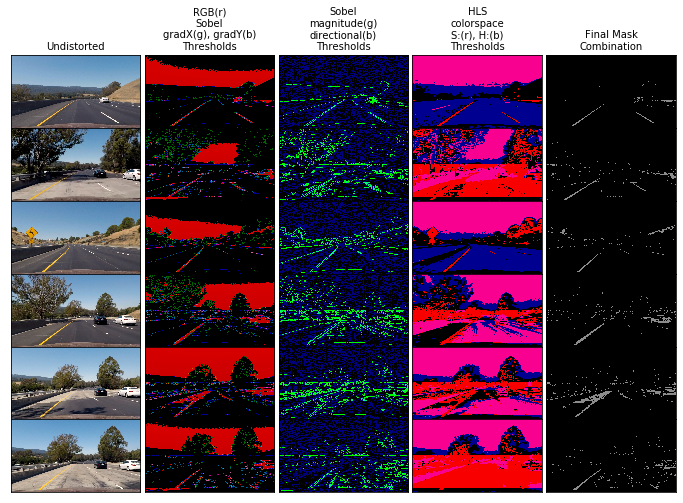

In [60]:
# Make a list of test images
filepath = "test_images/"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'*.jpg')

#"""
# Setup plot
fig = plt.figure(figsize=(12, len(images)*1.34))
w_ratios = [1 for n in range(5)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 5, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = 0
#"""

# loop through and display test images and apply current pipeline in sequence to them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_size = (img.shape[1], img.shape[0])
        
        # process image
        sky, ground, img0, img = process_image_stage1(img)
        #img0 = np.copy(img)

        # Run the functions
        cedge = canny(img0, 10, 36, 13)
        gradx = abs_sobel_thresh(img0, orient='x', thresh=(25, 100))
        grady = abs_sobel_thresh(img0, orient='y', thresh=(50, 150))
        magch = mag_thresh(img0, sobel_kernel=9, mag_thresh=(50, 250))
        dirch = dir_threshold(img0, sobel_kernel=15, thresh=(0.7, 1.3))
        sch = hls_s(img0, thresh=(88, 190))
        hch = hls_h(img0, thresh=(50, 100))
    
        # Output "masked_lines" is a single channel mask
        shadow = np.zeros_like(dirch).astype(np.uint8)
        shadow[(sch > 0) & (hch > 0)] = 128

        ignore_color = np.copy(gradx)*0 # creating a blank color channel for combining

        rEdgeDetect = ((img0[:,:,1]/4)).astype(np.uint8)
        rEdgeDetect = 255-rEdgeDetect
        rEdgeDetect[(rEdgeDetect>215)] = 0

        combined = np.zeros_like(dirch).astype(np.uint8)
        combined[((gradx > 0) | (grady > 0) | ((magch > 0) & (dirch > 0)) | (sch > 0)) & (shadow == 0) & (rEdgeDetect>0)] = 35
        
        img1 = np.dstack((rEdgeDetect, gradx, grady))

        img2 = np.dstack((ignore_color, magch, dirch))
        img3 = np.dstack((sch, shadow, hch))
        img4 = np.dstack((combined, combined, combined))
        
        #fig = plt.figure()
        #plt.imshow(img4*4)

        #"""
        # next image
        # undistorted
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img)
        if i==0:
            ax.set_title('Undistorted', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        # sobel gradx(r) and grady(g) thresholds
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img1)
        if i==1:
            ax.set_title('RGB(r)\nSobel\ngradX(g), gradY(b)\nThresholds', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        # magnitude(g) and directional(b) thresholds
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img2)
        if i==2:
            ax.set_title('Sobel\nmagnitude(g)\ndirectional(b)\nThresholds', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        # HLS colorspace analysis: (S: y) and (H: b) thresholds
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img3*4)
        if i==3:
            ax.set_title('HLS\ncolorspace\nS:(r), H:(b)\nThresholds', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        # Final Masking combination
        ax = plt.Subplot(fig, grid[i])
        if i==4:
            ax.set_title('Final Mask\nCombination', size=10)
        ax.imshow(img4*4)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        #"""


In [61]:
# create a region of interest mask
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


# draw outline of given area
def draw_area_of_interest(img, areas, color=[128,0,128], thickness=2):
    for points in areas:
        for i in range(len(points)-1):
            cv2.line(img, (points[i][0], points[i][1]), (points[i+1][0],points[i+1][1]), color, thickness)
        cv2.line(img, (points[0][0], points[0][1]), (points[len(points)-1][0],points[len(points)-1][1]), color, thickness)

# draw outline of given area        
def draw_area_of_interest_for_projection(img, areas, color=[128,0,128], thickness1=2, thickness2=10):
    for points in areas:
        for i in range(len(points)-1):
            if i==0 or i==1:
                cv2.line(img, (points[i][0], points[i][1]), (points[i+1][0],points[i+1][1]), color, thickness1)
            else:
                cv2.line(img, (points[i][0], points[i][1]), (points[i+1][0],points[i+1][1]), color, thickness2)
        cv2.line(img, (points[0][0], points[0][1]), (points[len(points)-1][0],points[len(points)-1][1]), color, thickness1)

def draw_masked_area(img, areas, color=[128,0,128], thickness=2):
    for points in areas:
        for i in range(len(points)-1):
            cv2.line(img, (points[i][0], points[i][1]), (points[i+1][0],points[i+1][1]), color, thickness)
        cv2.line(img, (points[0][0], points[0][1]), (points[len(points)-1][0],points[len(points)-1][1]), color, thickness)

def draw_bounding_box(img, boundingbox, color=[0,255,0], thickness=6):
    x1, y1, x2, y2 = boundingbox
    cv2.line(img, (x1, y1), (x2, y1), color, thickness)
    cv2.line(img, (x2, y1), (x2, y2), color, thickness)
    cv2.line(img, (x2, y2), (x1, y2), color, thickness)
    cv2.line(img, (x1, y2), (x1, y1), color, thickness)


# calculate and draw initial estimated lines on the roadway.
def draw_lines(img, lines, color=[255, 0, 0], thickness=6, backoff=0, debug=False):
    if backoff==0:
        backoff=thickness*5
    ysize = img.shape[0]
    midleft = img.shape[1]/2-200+backoff*2
    midright = img.shape[1]/2+200-backoff*2
    top = ysize/2+backoff*2
    rightslopemin = 0.5 #8/backoff
    rightslopemax = 3.0 #backoff/30
    leftslopemax =  -0.5 #-8/backoff
    leftslopemin = -3.0 #-backoff/30
    try:
        # rightline and leftline cumlators
        rl = {'num':0, 'slope':0.0, 'x1':0, 'y1':0, 'x2':0, 'y2':0}
        ll = {'num':0, 'slope':0.0, 'x1':0, 'y1':0, 'x2':0, 'y2':0}
        for line in lines:
            for x1,y1,x2,y2 in line:
                slope = ((y2-y1)/(x2-x1))
                sides = (x1+x2)/2
                vmid = (y1+y2)/2
                if slope > rightslopemin and slope < rightslopemax and sides > midright and vmid > top:   # right
                    if debug:
                        #print("x1,y1,x2,y2: ", x1, y1, x2, y2)
                        cv2.line(img, (x1, y1), (x2, y2), [128, 128, 0], thickness)
                    rl['num'] += 1
                    rl['slope'] += slope
                    rl['x1'] += x1
                    rl['y1'] += y1
                    rl['x2'] += x2
                    rl['y2'] += y2
                elif slope > leftslopemin and slope < leftslopemax and sides < midleft and vmid > top:   # left
                    if debug:
                        #print("x1,y1,x2,y2: ", x1, y1, x2, y2)
                        cv2.line(img, (x1, y1), (x2, y2), [128, 128, 0], thickness)
                    ll['num'] += 1
                    ll['slope'] += slope
                    ll['x1'] += x1
                    ll['y1'] += y1
                    ll['x2'] += x2
                    ll['y2'] += y2        

        if rl['num'] > 0 and ll['num'] > 0:
            # average/extrapolate all of the lines that makes the right line
            rslope = rl['slope']/rl['num']
            rx1 = int(rl['x1']/rl['num'])
            ry1 = int(rl['y1']/rl['num'])
            rx2 = int(rl['x2']/rl['num'])
            ry2 = int(rl['y2']/rl['num'])
            
            # average/extrapolate all of the lines that makes the left line
            lslope = ll['slope']/ll['num']
            lx1 = int(ll['x1']/ll['num'])
            ly1 = int(ll['y1']/ll['num'])
            lx2 = int(ll['x2']/ll['num'])
            ly2 = int(ll['y2']/ll['num'])
            
            # find the right and left line's intercept, which means solve the following two equations
            # rslope = ( yi - ry1 )/( xi - rx1)
            # lslope = ( yi = ly1 )/( xi - lx1)
            # solve for (xi, yi): the intercept of the left and right lines
            # which is:  xi = (ly2 - ry2 + rslope*rx2 - lslope*lx2)/(rslope-lslope)
            # and        yi = ry2 + rslope*(xi-rx2)
            xi = int((ly2 - ry2 + rslope*rx2 - lslope*lx2)/(rslope-lslope))
            yi = int(ry2 + rslope*(xi-rx2))
            
            # calculate backoff from intercept for right line
            if rslope > rightslopemin and rslope < rightslopemax:   # right
                ry1 = yi + int(backoff)
                rx1 = int(rx2-(ry2-ry1)/rslope)
                ry2 = ysize-1
                rx2 = int(rx1+(ry2-ry1)/rslope)
                cv2.line(img, (rx1, ry1), (rx2, ry2), [255, 0, 0], thickness)

            # calculate backoff from intercept for left line
            if lslope < leftslopemax and lslope > leftslopemin:   # left
                ly1 = yi + int(backoff)
                lx1 = int(lx2-(ly2-ly1)/lslope)
                ly2 = ysize-1
                lx2 = int(lx1+(ly2-ly1)/lslope)
                cv2.line(img, (lx1, ly1), (lx2, ly2), [255, 0, 0], thickness)
                
            if lx1 > 0 and ly1 > 0 and rx1 > 0 and ry1 > 0:
                cv2.line(img, (lx1, ly1), (rx1, ry1), [255, 0, 0], thickness)
        return lslope+rslope, lslope, rslope, (lx1,ly1), (rx1,ry1), (rx2, ry2), (lx2, ly2), (xi, yi)
    except:
        return -1000, 0.0, 0.0, (0,0), (0,0), (0,0), (0,0)

# draw parallel lines in a perspective image that will later be projected into a flat surface
def draw_parallel_lines_pre_projection(img, lane_info, color=[128,0,0], thickness=5):
    lx1 = lane_info[3][0]
    rx1 = lane_info[4][0]
    rx2 = lane_info[5][0]
    lx2 = lane_info[6][0]
    ly1 = lane_info[3][1]
    ry1 = lane_info[4][1]
    ry2 = lane_info[5][1]
    ly2 = lane_info[6][1]
    cv2.line(img, (lx1, ly1), (lx2, ly2), color, thickness)
    cv2.line(img, (rx1, ry1), (rx2, ry2), color, thickness)

# generate a set of hough lines and calculates its estimates for lane lines
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap, backoff=0, debug=False):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn using the new single line for left and right lane line method.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    masked_lines = np.zeros(img.shape, dtype=np.uint8)
    lane_info = draw_lines(masked_lines, lines, backoff=backoff, debug=debug)
    
    return masked_lines, lane_info


# function to project the undistorted camera image to a plane looking down.
def unwarp_lane(img, src, dst, mtx):
    # Pass in your image, 4 source points src = np.float32([[,],[,],[,],[,]])
    # and 4 destination points dst = np.float32([[,],[,],[,],[,]])
    # Note: you could pick any four of the detected corners 
    # as long as those four corners define a rectangle
    # One especially smart way to do this would be to use four well-chosen
    # use cv2.getPerspectiveTransform() to get M, the transform matrix
    # use cv2.warpPerspective() to warp your image to a top-down view
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    # warped = gray
    return warped, M

# Current pipeline
# - distortion correction
# - detect lane pixels and fit to find lane boundary.
# - geometric sublevel processing
def process_image(img, debug=False):
    # mask calculations
    imshape = img.shape
    xbottom1 = int(imshape[1]/16)
    xbottom2 = int(imshape[1]*15/16)
    xtop1 = int(imshape[1]*14/32)
    xtop2 = int(imshape[1]*18/32)
    ybottom1 = imshape[0]
    ybottom2 = imshape[0]
    ytopbox = int(imshape[0]*9/16)
    
    # Run the functions
    gradx = abs_sobel_thresh(img, orient='x', thresh=(25, 100))
    grady = abs_sobel_thresh(img, orient='y', thresh=(50, 150))
    magch = mag_thresh(img, sobel_kernel=9, mag_thresh=(50, 250))
    dirch = dir_threshold(img, sobel_kernel=15, thresh=(0.7, 1.3))
    sch = hls_s(img, thresh=(88, 190))
    hch = hls_h(img, thresh=(50, 100))
    
    # Output "masked_lines" is a single channel mask
    shadow = np.zeros_like(dirch).astype(np.uint8)
    shadow[(sch > 0) & (hch > 0)] = 128
    
    rEdgeDetect = ((img[:,:,1]/4)).astype(np.uint8)
    rEdgeDetect = 255-rEdgeDetect
    rEdgeDetect[(rEdgeDetect>210)] = 0

    combined = np.zeros_like(dirch).astype(np.uint8)
    combined[((gradx > 0) | (grady > 0) | ((magch > 0) & (dirch > 0)) | (sch > 0)) & (shadow == 0) & (rEdgeDetect>0)] = 35

    # This time we are defining a four sided polygon to mask
    # We can lift the mask higher now, since the line drawing function is a bit smarter
    vertices = np.array([[(xbottom1,ybottom1),(xtop1, ytopbox), (xtop2, ytopbox), (xbottom2,ybottom2)]], dtype=np.int32)
    masked_edges = region_of_interest(combined, vertices)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 40     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 120 # 50 75 25 minimum number of pixels making up a line
    max_line_gap = 40    # 40 50 20 maximum gap in pixels between connectable line segments

    line_image, lane_info = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap, backoff=30, debug=debug)
    if lane_info[0] == -1000:
        # Define the Hough transform parameters
        # Make a blank the same size as our image to draw on
        rho = 2 # distance resolution in pixels of the Hough grid
        theta = np.pi/180 # angular resolution in radians of the Hough grid
        threshold = 40     # minimum number of votes (intersections in Hough grid cell)
        min_line_length = 75 # 50 75 25 minimum number of pixels making up a line
        max_line_gap = 40    # 40 50 20 maximum gap in pixels between connectable line segments
        line_image, lane_info = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap, backoff=40, debug=debug)
        if lane_info[0] == -1000:
            # Define the Hough transform parameters
            # Make a blank the same size as our image to draw on
            rho = 2 # distance resolution in pixels of the Hough grid
            theta = np.pi/180 # angular resolution in radians of the Hough grid
            threshold = 40     # minimum number of votes (intersections in Hough grid cell)
            min_line_length = 25 # 50 75 25 minimum number of pixels making up a line
            max_line_gap = 20    # 40 50 20 maximum gap in pixels between connectable line segments
            line_image, lane_info = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap, backoff=50, debug=debug)
            if lane_info[0] == -1000:
                # Define the Hough transform parameters
                # Make a blank the same size as our image to draw on
                rho = 2 # distance resolution in pixels of the Hough grid
                theta = np.pi/180 # angular resolution in radians of the Hough grid
                threshold = 40     # minimum number of votes (intersections in Hough grid cell)
                min_line_length = 20 # 50 75 25 minimum number of pixels making up a line
                max_line_gap = 20    # 40 50 20 maximum gap in pixels between connectable line segments
                line_image, lane_info = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap, backoff=50, debug=debug)
                font = cv2.FONT_HERSHEY_COMPLEX
                cv2.putText(img, '4', (30, 60), font, 1, (255,0,0), 2)
            else:
                font = cv2.FONT_HERSHEY_COMPLEX
                cv2.putText(img, '3', (30, 60), font, 1, (255,0,0), 2)
        else:
            font = cv2.FONT_HERSHEY_COMPLEX
            cv2.putText(img, '2', (30, 60), font, 1, (255,0,0), 2)
    else:
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(img, '1', (30, 60), font, 1, (255,0,0), 2)

    if debug and lane_info[0] > -1000:
        leftbound  = int(lane_info[7][0]-(imshape[1]*0.1))
        rightbound = int(lane_info[7][0]+(imshape[1]*0.1))
        topbound =  int(lane_info[7][1]-(imshape[0]*0.15))
        bottombound = int(lane_info[7][1]+(imshape[0]*0.05))
        boundingbox = (leftbound-2,topbound-2,rightbound+2,bottombound+2)
        draw_masked_area(img, vertices)
        draw_bounding_box(img, boundingbox)
                        
    # calculate the area of interest, this will be used later to reproject just the lanes that needs advance finding
    areaOfInterest = np.array([[(lane_info[3][0]-50,lane_info[3][1]-11),(lane_info[4][0]+50,lane_info[4][1]-11), (lane_info[4][0]+525,lane_info[4][1]+75), (lane_info[4][0]+500,lane_info[5][1]-25), (lane_info[4][0]-500,lane_info[6][1]-25), (lane_info[3][0]-525,lane_info[3][1]+75)]], dtype=np.int32)

    # return the merged lines
    return img, line_image, masked_edges, lane_info, areaOfInterest



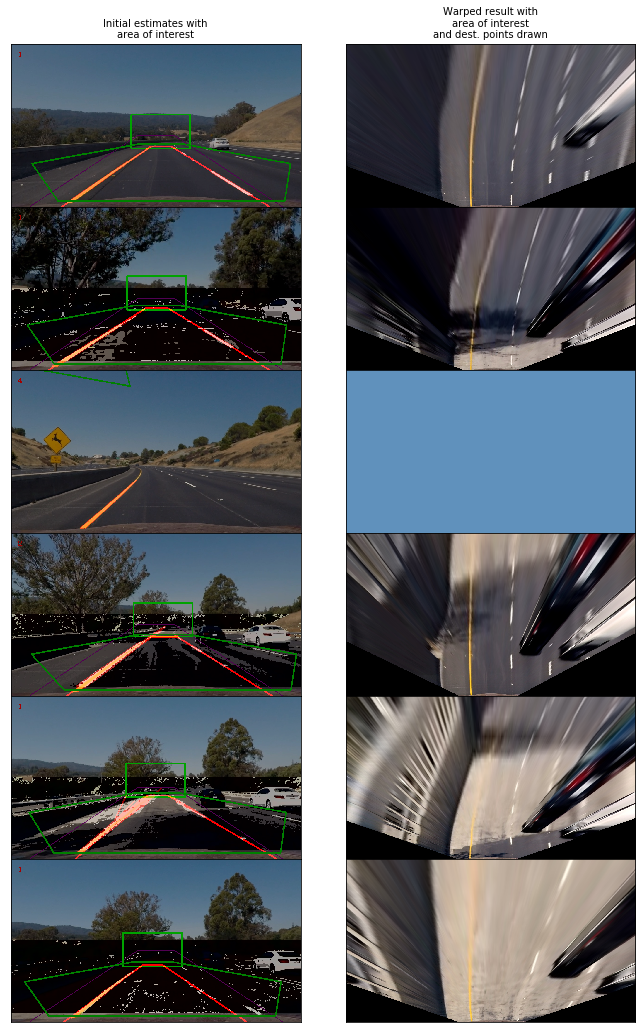

In [62]:
# Make a list of test images
filepath = "test_images/"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'*.jpg')

# Setup plot
fig = plt.figure(figsize=(12, len(images)*3))
w_ratios = [1 for n in range(2)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 2, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = 0

# loop through and display test images and undististort them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_size = (img.shape[1], img.shape[0])
        
        # process image
        sky, ground, img0, img = process_image_stage1(img)
        img0, line_image, masked_edges, lane_info, areaOfInterest = process_image(img0, debug=True)

        ignore_color = np.copy(line_image)*0 # creating a blank color channel for combining

        # generate estimated line image
        line_image = np.dstack((line_image, ignore_color, ignore_color))
        
        # masked overlay estimated lane line
        masked_edges = np.dstack((masked_edges, masked_edges, masked_edges))
        
        # just the image with the estimated lane line projection
        img1 = miximg(img0, masked_edges)
        img1 = miximg(img1, line_image)
        draw_area_of_interest(img1, areaOfInterest, color=[0,128,0], thickness=5)

        # generate overlay line image
        draw_area_of_interest_for_projection(img2, areaOfInterest, color=[0,128,0], thickness1=1, thickness2=50)
        draw_parallel_lines_pre_projection(img2, lane_info, color=[128,0,0], thickness=2)
        
        # generate src and dst rects
        us_lane_width = 12     # US highway width: 12 feet wide
        approx_dest = 20       # Approximate distance to vanishing point from end of rectangle
        scale_factor = 15      # scaling for display
        left = -us_lane_width/2*scale_factor
        right = us_lane_width/2*scale_factor
        top = approx_dest * scale_factor
        src = np.float32([lane_info[3],lane_info[4],lane_info[5],lane_info[6]])
        dst = np.float32([[img_size[0]/2+left,top],[img_size[0]/2+right,top],[img_size[0]/2+right,img_size[1]],[img_size[0]/2+left,img_size[1]]])
        img2, M = unwarp_lane(img, src, dst, mtx) #(img2, src, dst, mtx)

        img3 = np.copy(masked_edges)
        guide = np.copy(masked_edges)*0
        draw_parallel_lines_pre_projection(guide, lane_info, color=[128,128,0], thickness=50)
        img3, M = unwarp_lane(img3, src, dst, mtx)
        guide, M = unwarp_lane(guide, src, dst, mtx)
        guide = cv2.cvtColor(guide, cv2.COLOR_BGR2GRAY)
        img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

        # next image
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img1)
        if i==0:
            ax.set_title('Initial estimates with\narea of interest', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img2)
        if i==1:
            ax.set_title('Warped result with\narea of interest\nand dest. points drawn', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1


In [63]:
# Current pipeline
# - distortion correction
# - detect lane pixels and fit to find lane boundary.
# - geometric sublevel processing
def process_image(img, debug=False):
    # mask calculations
    imshape = img.shape
    xbottom1 = int(imshape[1]/16)
    xbottom2 = int(imshape[1]*15/16)
    xtop1 = int(imshape[1]*14/32)
    xtop2 = int(imshape[1]*18/32)
    ybottom1 = imshape[0]
    ybottom2 = imshape[0]
    ytopbox = int(imshape[0]*9/16)
    
    # Run the functions
    gradx = abs_sobel_thresh(img, orient='x', thresh=(25, 100))
    grady = abs_sobel_thresh(img, orient='y', thresh=(50, 150))
    magch = mag_thresh(img, sobel_kernel=9, mag_thresh=(50, 250))
    dirch = dir_threshold(img, sobel_kernel=15, thresh=(0.7, 1.3))
    sch = hls_s(img, thresh=(88, 190))
    hch = hls_h(img, thresh=(50, 100))
    
    # Output "masked_lines" is a single channel mask
    shadow = np.zeros_like(dirch).astype(np.uint8)
    shadow[(sch > 0) & (hch > 0)] = 128
    
    rEdgeDetect = ((img[:,:,1]/4)).astype(np.uint8)
    rEdgeDetect = 255-rEdgeDetect
    rEdgeDetect[(rEdgeDetect>210)] = 0

    combined = np.zeros_like(dirch).astype(np.uint8)
    combined[((gradx > 0) | (grady > 0) | ((magch > 0) & (dirch > 0)) | (sch > 0)) & (shadow == 0) & (rEdgeDetect>0)] = 35

    # This time we are defining a four sided polygon to mask
    # We can lift the mask higher now, since the line drawing function is a bit smarter
    vertices = np.array([[(xbottom1,ybottom1),(xtop1, ytopbox), (xtop2, ytopbox), (xbottom2,ybottom2)]], dtype=np.int32)
    masked_edges = region_of_interest(combined, vertices)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 40     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 75 #minimum number of pixels making up a line
    max_line_gap = 50    # maximum gap in pixels between connectable line segments

    line_image, lane_info = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)
    if debug:
        leftbound  = int(lane_info[7][0]-(imshape[1]*0.1))
        rightbound = int(lane_info[7][0]+(imshape[1]*0.1))
        topbound =  int(lane_info[7][1]-(imshape[0]*0.15))
        bottombound = int(lane_info[7][1]+(imshape[0]*0.05))
        boundingbox = (leftbound-2,topbound-2,rightbound+2,bottombound+2)
        draw_masked_area(img, vertices)
        draw_bounding_box(img, boundingbox)
                        
    # calculate the area of interest, this will be used later to reproject just the lanes that needs advance finding
    areaOfInterest = np.array([[(lane_info[3][0]-50,lane_info[3][1]-11),(lane_info[4][0]+50,lane_info[4][1]-11), (lane_info[4][0]+525,lane_info[4][1]+75), (lane_info[4][0]+500,lane_info[5][1]-25), (lane_info[4][0]-500,lane_info[6][1]-25), (lane_info[3][0]-525,lane_info[3][1]+75)]], dtype=np.int32)

    # generate src and dst rects
    us_lane_width = 12     # US highway width: 12 feet wide
    approx_dest = 20       # Approximate distance to vanishing point from end of rectangle
    scale_factor = 15      # scaling for display
    left = -us_lane_width/2*scale_factor
    right = us_lane_width/2*scale_factor
    top = approx_dest * scale_factor
    src = np.float32([lane_info[3],lane_info[4],lane_info[5],lane_info[6]])
    dst = np.float32([[img_size[0]/2+left,top],[img_size[0]/2+right,top],[img_size[0]/2+right,img_size[1]],[img_size[0]/2+left,img_size[1]]])
    img, M = unwarp_lane(img, src, dst, mtx)

    # return the merged lines
    return img, line_image, masked_edges, lane_info, areaOfInterest


In [68]:
# Make a list of test images
filepath = "test_images/"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'*.jpg')

#"""
# Setup plot
fig = plt.figure(figsize=(12, len(images)*1.34))
w_ratios = [1 for n in range(5)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 5, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = 0
#"""

# loop through and display test images and apply current pipeline in sequence to them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_size = (img.shape[1], img.shape[0])
        
        # process image
        img0 = cv2.undistort(img, mtx, dist, None, mtx)
        sky, ground, img0 = process_image_stage1(img0)
        img0, line_image, masked_edges, lane_info, areaOfInterest = process_image(img0, debug=False)
        ignore_color = np.copy(line_image)*0 # creating a blank color channel for combining

        # Run the functions
        cedge = canny(img0, 10, 36, 13)
        gradx = abs_sobel_thresh(img0, orient='x', thresh=(25, 100))
        grady = abs_sobel_thresh(img0, orient='y', thresh=(50, 150))
        magch = mag_thresh(img0, sobel_kernel=9, mag_thresh=(50, 250))
        dirch = dir_threshold(img0, sobel_kernel=15, thresh=(0.7, 1.3))
        sch = hls_s(img0, thresh=(88, 190))
        hch = hls_h(img0, thresh=(50, 100))
    
        # Output "masked_lines" is a single channel mask
        shadow = np.zeros_like(dirch).astype(np.uint8)
        shadow[(sch > 0) & (hch > 0)] = 128

        ignore_color = np.copy(gradx)*0 # creating a blank color channel for combining

        rEdgeDetect = ((img0[:,:,1]/4)).astype(np.uint8)
        rEdgeDetect = 255-rEdgeDetect
        rEdgeDetect[(rEdgeDetect>215)] = 0

        combined = np.zeros_like(dirch).astype(np.uint8)
        combined[((gradx > 0) | (grady > 0) | ((magch > 0) & (dirch > 0)) | (sch > 0)) & (shadow == 0) & (rEdgeDetect>0)] = 35
        
        img1 = np.dstack((rEdgeDetect, gradx, grady))

        img2 = np.dstack((ignore_color, magch, dirch))
        img3 = np.dstack((sch, shadow, hch))
        img4 = np.dstack((combined, combined, combined))
        
        #fig = plt.figure()
        #plt.imshow(img4*4)

        #"""
        # next image
        # undistorted
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img0)
        if i==0:
            ax.set_title('Undistorted', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        # sobel gradx(r) and grady(g) thresholds
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img1)
        if i==1:
            ax.set_title('RGB(r)\nSobel\ngradX(g), gradY(b)\nThresholds', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        # magnitude(g) and directional(b) thresholds
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img2)
        if i==2:
            ax.set_title('Sobel\nmagnitude(g)\ndirectional(b)\nThresholds', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        # HLS colorspace analysis: (S: y) and (H: b) thresholds
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img3*4)
        if i==3:
            ax.set_title('HLS\ncolorspace\nS:(y), H:(b)\nThresholds', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        # Final Masking combination
        ax = plt.Subplot(fig, grid[i])
        if i==4:
            ax.set_title('Final Mask\nCombination', size=10)
        ax.imshow(img4*4)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        #"""



ValueError: too many values to unpack (expected 3)

<Figure size 864x578.88 with 0 Axes>

In [69]:
# create a region of interest mask
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# draw outline of given area
def draw_area_of_interest(img, areas, color=[128,0,128], thickness=2):
    for points in areas:
        for i in range(len(points)-1):
            cv2.line(img, (points[i][0], points[i][1]), (points[i+1][0],points[i+1][1]), color, thickness)
        cv2.line(img, (points[0][0], points[0][1]), (points[len(points)-1][0],points[len(points)-1][1]), color, thickness)

# draw outline of given area        
def draw_area_of_interest_for_projection(img, areas, color=[128,0,128], thickness1=2, thickness2=10):
    for points in areas:
        for i in range(len(points)-1):
            if i==0 or i==1:
                cv2.line(img, (points[i][0], points[i][1]), (points[i+1][0],points[i+1][1]), color, thickness1)
            else:
                cv2.line(img, (points[i][0], points[i][1]), (points[i+1][0],points[i+1][1]), color, thickness2)
        cv2.line(img, (points[0][0], points[0][1]), (points[len(points)-1][0],points[len(points)-1][1]), color, thickness1)

def draw_masked_area(img, areas, color=[128,0,128], thickness=2):
    for points in areas:
        for i in range(len(points)-1):
            cv2.line(img, (points[i][0], points[i][1]), (points[i+1][0],points[i+1][1]), color, thickness)
        cv2.line(img, (points[0][0], points[0][1]), (points[len(points)-1][0],points[len(points)-1][1]), color, thickness)

def draw_bounding_box(img, boundingbox, color=[0,255,0], thickness=6):
    x1, y1, x2, y2 = boundingbox
    cv2.line(img, (x1, y1), (x2, y1), color, thickness)
    cv2.line(img, (x2, y1), (x2, y2), color, thickness)
    cv2.line(img, (x2, y2), (x1, y2), color, thickness)
    cv2.line(img, (x1, y2), (x1, y1), color, thickness)

# calculate and draw initial estimated lines on the roadway.
def draw_lines(img, lines, color=[255, 0, 0], backoff=5, thickness=6, debug=False):
    ysize = img.shape[0]
    try:
        # rightline and leftline cumlators
        rl = {'num':0, 'slope':0.0, 'x1':0, 'y1':0, 'x2':0, 'y2':0}
        ll = {'num':0, 'slope':0.0, 'x1':0, 'y1':0, 'x2':0, 'y2':0}
        for line in lines:
            for x1,y1,x2,y2 in line:
                slope = ((y2-y1)/(x2-x1))
                if slope > 0.5 and slope < 1.0:   # right
                    rl['num'] += 1
                    rl['slope'] += slope
                    rl['x1'] += x1
                    rl['y1'] += y1
                    rl['x2'] += x2
                    rl['y2'] += y2
                elif slope > -1.0 and slope < -0.5:   # left
                    ll['num'] += 1
                    ll['slope'] += slope
                    ll['x1'] += x1
                    ll['y1'] += y1
                    ll['x2'] += x2
                    ll['y2'] += y2        

        if rl['num'] > 0 and ll['num'] > 0:
            # average/extrapolate all of the lines that makes the right line
            rslope = rl['slope']/rl['num']
            rx1 = int(rl['x1']/rl['num'])
            ry1 = int(rl['y1']/rl['num'])
            rx2 = int(rl['x2']/rl['num'])
            ry2 = int(rl['y2']/rl['num'])
            
            # average/extrapolate all of the lines that makes the left line
            lslope = ll['slope']/ll['num']
            lx1 = int(ll['x1']/ll['num'])
            ly1 = int(ll['y1']/ll['num'])
            lx2 = int(ll['x2']/ll['num'])
            ly2 = int(ll['y2']/ll['num'])
            
            # find the right and left line's intercept, which means solve the following two equations
            # rslope = ( yi - ry1 )/( xi - rx1)
            # lslope = ( yi = ly1 )/( xi - lx1)
            # solve for (xi, yi): the intercept of the left and right lines
            # which is:  xi = (ly2 - ry2 + rslope*rx2 - lslope*lx2)/(rslope-lslope)
            # and        yi = ry2 + rslope*(xi-rx2)
            xi = int((ly2 - ry2 + rslope*rx2 - lslope*lx2)/(rslope-lslope))
            yi = int(ry2 + rslope*(xi-rx2))
            
            # calculate backoff from intercept for right line
            if rslope > 0.5 and rslope < 1.0:   # right
                ry1 = yi + int(backoff)
                rx1 = int(rx2-(ry2-ry1)/rslope)
                ry2 = ysize-1
                rx2 = int(rx1+(ry2-ry1)/rslope)
                cv2.line(img, (rx1, ry1), (rx2, ry2), [255, 0, 0], thickness)

            # calculate backoff from intercept for left line
            if lslope < -0.5 and lslope > -1.0:   # left
                ly1 = yi + int(backoff)
                lx1 = int(lx2-(ly2-ly1)/lslope)
                ly2 = ysize-1
                lx2 = int(lx1+(ly2-ly1)/lslope)
                cv2.line(img, (lx1, ly1), (lx2, ly2), [255, 0, 0], thickness)
                
            if lx1 > 0 and ly1 > 0 and rx1 > 0 and ry1 > 0:
                cv2.line(img, (lx1, ly1), (rx1, ry1), [255, 0, 0], thickness)
        # print("hough y: ", ry1, ly1)
        return lslope+rslope, lslope, rslope, (lx1,ly1), (rx1,ry1), (rx2, ry2), (lx2, ly2), (xi, yi)
    except:
        return -1000, 0.0, 0.0, (0,0), (0,0), (0,0), (0,0)

# draw parallel lines in a perspective image that will later be projected into a flat surface
def draw_parallel_lines_pre_projection(img, lane_info, color=[128,0,0], thickness=5):
    lx1 = lane_info[3][0]
    rx1 = lane_info[4][0]
    rx2 = lane_info[5][0]
    lx2 = lane_info[6][0]
    ly1 = lane_info[3][1]
    ry1 = lane_info[4][1]
    ry2 = lane_info[5][1]
    ly2 = lane_info[6][1]
    cv2.line(img, (lx1, ly1), (lx2, ly2), color, thickness)
    cv2.line(img, (rx1, ry1), (rx2, ry2), color, thickness)

# generate a set of hough lines and calculates its estimates for lane lines
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap, backoff=6*5, debug=False):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn using the new single line for left and right lane line method.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    masked_lines = np.zeros(img.shape, dtype=np.uint8)
    lane_info = draw_lines(masked_lines, lines, backoff=backoff, debug=debug)
    
    return masked_lines, lane_info

# function to project the undistorted camera image to a plane looking down.
def unwarp_lane(img, src, dst, mtx):
    # Pass in your image, 4 source points src = np.float32([[,],[,],[,],[,]])
    # and 4 destination points dst = np.float32([[,],[,],[,],[,]])
    # Note: you could pick any four of the detected corners 
    # as long as those four corners define a rectangle
    # One especially smart way to do this would be to use four well-chosen
    # use cv2.getPerspectiveTransform() to get M, the transform matrix
    # use cv2.warpPerspective() to warp your image to a top-down view
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    # warped = gray
    return warped, M

# function to find starting lane line positions
# return left and right column positions
def find_lane_locations(guiding_lines):
    start_row = guiding_lines.shape[0]-16
    histogram = np.sum(guiding_lines[start_row:start_row+16,:], axis=0).astype(np.uint8)
    ncol = len(histogram)-1
    left = {'count':0, 'position':0}
    right = {'count':0, 'position':ncol}
    for i in range(int(len(histogram)/2)):
        if histogram[i] > left['count']:
            left['count'] = histogram[i]
            left['position'] = i
        if histogram[ncol-i] > right['count']:
            right['count'] = histogram[ncol-i]
            right['position'] = ncol-i
    return left['position']+4, right['position']-4, right['position']-left['position']-4

# function to find lane line positions given histogram row, last column positions and n_neighbors
# return left and right column positions
def find_lane_nearest_neighbors(histogram, lastleftpos, lastrightpos, nneighbors):
    ncol = len(histogram)-1
    leftx = []
    rightx = []
    left = {"count":0, "position":lastleftpos}
    right = {"count":0, "position":lastrightpos}
    for i in range(nneighbors):
        if histogram[lastleftpos+i] > 0:
            leftx.append(lastleftpos+i)
            if left['count'] < histogram[lastleftpos+i]:
                left['count'] = histogram[lastleftpos+i]
                left['position'] = lastleftpos+i
        if (lastleftpos-i) > 0 and histogram[lastleftpos-i] > 0:
            leftx.append(lastleftpos-i)
            if left['count'] < histogram[lastleftpos-i]:
                left['count'] = histogram[lastleftpos-i]
                left['position'] = lastleftpos-i
        if (lastrightpos+i)< ncol and histogram[lastrightpos+i] > 0:
            rightx.append(lastrightpos+i)
            if right['count'] < histogram[lastrightpos+i]:
                right['count'] = histogram[lastrightpos+i]
                right['position'] = lastrightpos+i
        if (lastrightpos+i)< ncol and histogram[lastrightpos-i] > 0:
            rightx.append(lastrightpos-i)
            if right['count'] < histogram[lastrightpos-i]:
                right['count'] = histogram[lastrightpos-i]
                right['position'] = lastrightpos-i
    return left['position'], right['position'], leftx, rightx

def find_lane_lines_points(masked_lines, leftpos, rightpos, distance, found=False):
    leftval = []
    rightval = []
    yval = []
    nrows = masked_lines.shape[0] - 1
    neighbors = 16
    if True:
        left1 = leftpos
        right1 = rightpos
        start_row = nrows-16
        for i in range(int((nrows/neighbors))):
            histogram = np.sum(masked_lines[start_row+10:start_row+26,:], axis=0).astype(np.uint8)
            left2, right2, leftx, rightx = find_lane_nearest_neighbors(histogram, left1, right1, int(neighbors*1.3))
            y = start_row + neighbors
            if len(leftx) < len(rightx):
                extra = len(rightx) - len(leftx)
                for i in range(len(rightx)):
                    rightval.append(rightx[i])
                    yval.append(y)
                for i in range(len(leftx)):
                    leftval.append(leftx[i])
                for i in range(extra):
                    leftval.append(rightx[i]-distance)
                if len(leftx) == 0 and not found:
                    distance -= 1
                    left1 = right2-distance
                else:
                    left1 = left2
                right1 = right2
            else:
                extra = len(leftx) - len(rightx)
                for i in range(len(leftx)):
                    leftval.append(leftx[i])
                    yval.append(y)
                for i in range(len(rightx)):
                    rightval.append(rightx[i])
                for i in range(extra):
                    rightval.append(leftx[i]+distance)
                if len(rightx) == 0 and not found:
                    distance -= 1
                    right1 = right2+distance
                else:
                    right1 = right2
                left1 = left2
         
            start_row -= neighbors
    return np.array(leftval), np.array(rightval), np.array(yval)


IndexError: tuple index out of range

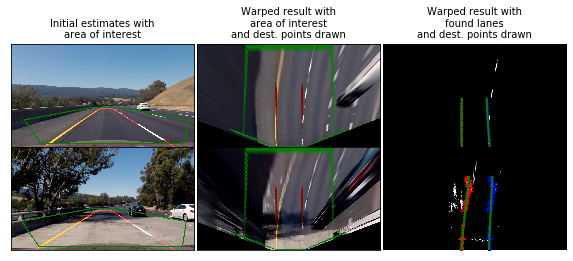

In [70]:
# Make a list of test images
filepath = "test_images/"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'*.jpg')

# Setup plot
fig = plt.figure(figsize=(10, len(images)*1.9))
w_ratios = [1 for n in range(3)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 3, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = 0

# loop through and display test images and apply current pipeline to them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_size = (img.shape[1], img.shape[0])
        
        # process image
        sky, ground, img0, img = process_image_stage1(img)
        img0, line_image, masked_edges, lane_info, areaOfInterest = process_image(img0, debug=True)
        ignore_color = np.copy(line_image)*0 # creating a blank color channel for combining

        # generate estimated line image
        line_image = np.dstack((line_image, ignore_color, ignore_color))
        
        # masked overlay estimated lane line
        masked_edges = np.dstack((masked_edges, masked_edges, masked_edges))
        
        # just the image with the estimated lane line projection
        img1 = miximg(masked_edges, img)
        img1 = miximg(line_image, img1)
        draw_area_of_interest(img1, areaOfInterest, color=[0,128,0], thickness=5)

        # generate overlay line image
        img2 = np.copy(img)
        img2 = miximg(masked_edges*2, img)
        draw_area_of_interest_for_projection(img2, areaOfInterest, color=[0,128,0], thickness1=1, thickness2=50)
        draw_parallel_lines_pre_projection(img2, lane_info, color=[128,0,0], thickness=2)
        
        # generate src and dst rects
        us_lane_width = 12     # US highway width: 12 feet wide
        approx_dest = 20       # Approximate distance to vanishing point from end of rectangle
        scale_factor = 15      # scaling for display
        left = -us_lane_width/2*scale_factor
        right = us_lane_width/2*scale_factor
        top = approx_dest * scale_factor
        src = np.float32([lane_info[3],lane_info[4],lane_info[5],lane_info[6]])
        dst = np.float32([[img_size[0]/2+left,top],[img_size[0]/2+right,top],[img_size[0]/2+right,img_size[1]],[img_size[0]/2+left,img_size[1]]])
        img2, M = unwarp_lane(img2, src, dst, mtx)

        img3 = np.copy(masked_edges)
        guide = np.copy(masked_edges)*0
        draw_parallel_lines_pre_projection(guide, lane_info, color=[128,128,0], thickness=50)
        img3, M = unwarp_lane(img3, src, dst, mtx)
        guide, M = unwarp_lane(guide, src, dst, mtx)
        guide = cv2.cvtColor(guide, cv2.COLOR_BGR2GRAY)
        img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
        
        # return left and right column positions
        left, right, distance = find_lane_locations(guide)

        # function to find lane lines points using a sliding window histogram given starting positions
        # return arrays or left, right and y positions
        leftx, rightx, yvals = find_lane_lines_points(img3, left, right, distance)
        
        # Fit a second order polynomial to each lane line
        if len(yvals) > 0:
            leftcoefficients = np.polyfit(yvals, leftx, 2)
            leftpolynomial = np.poly1d(leftcoefficients)
            left_fitx = leftpolynomial(yvals)

            rightcoefficients = np.polyfit(yvals, rightx, 2)
            rightpolynomial = np.poly1d(rightcoefficients)
            right_fitx = rightpolynomial(yvals)

        #fig = plt.figure()
        #plt.imshow(img1)
        
        # next image
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img1)
        if i==0:
            ax.set_title('Initial estimates with\narea of interest', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img2)
        if i==1:
            ax.set_title('Warped result with\narea of interest\nand dest. points drawn', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        ax = plt.Subplot(fig, grid[i])
        if i==2:
            ax.set_title('Warped result with\nfound lanes\nand dest. points drawn', size=10)
        if len(yvals) > 0:
            ax.scatter(leftx, yvals, marker='+', c='r', s=1, zorder=2)
            ax.scatter(rightx, yvals, marker='+', c='b', s=1, zorder=2)
            ax.plot(left_fitx, yvals, color='green', linewidth=2, zorder=3)
            ax.plot(right_fitx, yvals, color='green', linewidth=2, zorder=3)
            ax.set_ylim(719, 0)
            ax.set_xlim(0,1279)
            ax.imshow(img3, cmap='gray',  zorder=1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('off')
            fig.add_subplot(ax)
        else:
            ax.text(0.1,0.1,'No lane lines found!', size=10)
        i += 1



IndexError: tuple index out of range

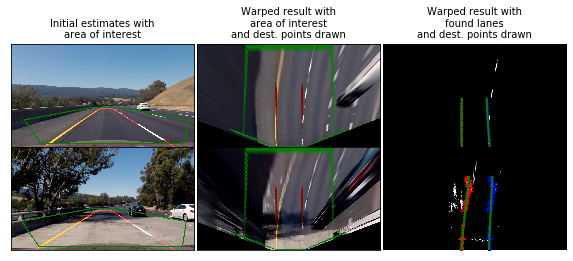

In [71]:
# Make a list of test images
filepath = "test_images/"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'*.jpg')

# Setup plot
fig = plt.figure(figsize=(10, len(images)*1.9))
w_ratios = [1 for n in range(3)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 3, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = 0

# loop through and display test images and apply current pipeline to them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_size = (img.shape[1], img.shape[0])
        
        # process image
        sky, ground, img0, img = process_image_stage1(img)
        img0, line_image, masked_edges, lane_info, areaOfInterest = process_image(img0, debug=True)
        ignore_color = np.copy(line_image)*0 # creating a blank color channel for combining

        # generate estimated line image
        line_image = np.dstack((line_image, ignore_color, ignore_color))
        
        # masked overlay estimated lane line
        masked_edges = np.dstack((masked_edges, masked_edges, masked_edges))
        
        # just the image with the estimated lane line projection
        img1 = miximg(masked_edges, img)
        img1 = miximg(line_image, img1)
        draw_area_of_interest(img1, areaOfInterest, color=[0,128,0], thickness=5)

        # generate overlay line image
        img2 = np.copy(img)
        img2 = miximg(masked_edges*2, img)
        draw_area_of_interest_for_projection(img2, areaOfInterest, color=[0,128,0], thickness1=1, thickness2=50)
        draw_parallel_lines_pre_projection(img2, lane_info, color=[128,0,0], thickness=2)
        
        # generate src and dst rects
        us_lane_width = 12     # US highway width: 12 feet wide
        approx_dest = 20       # Approximate distance to vanishing point from end of rectangle
        scale_factor = 15      # scaling for display
        left = -us_lane_width/2*scale_factor
        right = us_lane_width/2*scale_factor
        top = approx_dest * scale_factor
        src = np.float32([lane_info[3],lane_info[4],lane_info[5],lane_info[6]])
        dst = np.float32([[img_size[0]/2+left,top],[img_size[0]/2+right,top],[img_size[0]/2+right,img_size[1]],[img_size[0]/2+left,img_size[1]]])
        img2, M = unwarp_lane(img2, src, dst, mtx)

        img3 = np.copy(masked_edges)
        guide = np.copy(masked_edges)*0
        draw_parallel_lines_pre_projection(guide, lane_info, color=[128,128,0], thickness=50)
        img3, M = unwarp_lane(img3, src, dst, mtx)
        guide, M = unwarp_lane(guide, src, dst, mtx)
        guide = cv2.cvtColor(guide, cv2.COLOR_BGR2GRAY)
        img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
        
        # return left and right column positions
        left, right, distance = find_lane_locations(guide)

        # function to find lane lines points using a sliding window histogram given starting positions
        # return arrays or left, right and y positions
        leftx, rightx, yvals = find_lane_lines_points(img3, left, right, distance)
        
        # Fit a second order polynomial to each lane line
        if len(yvals) > 0:
            leftcoefficients = np.polyfit(yvals, leftx, 2)
            leftpolynomial = np.poly1d(leftcoefficients)
            left_fitx = leftpolynomial(yvals)

            rightcoefficients = np.polyfit(yvals, rightx, 2)
            rightpolynomial = np.poly1d(rightcoefficients)
            right_fitx = rightpolynomial(yvals)

        # next image
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img1)
        if i==0:
            ax.set_title('Initial estimates with\narea of interest', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img2)
        if i==1:
            ax.set_title('Warped result with\narea of interest\nand dest. points drawn', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        ax = plt.Subplot(fig, grid[i])
        if i==2:
            ax.set_title('Warped result with\nfound lanes\nand dest. points drawn', size=10)
        if len(yvals) > 0:
            ax.scatter(leftx, yvals, marker='+', c='r', s=1, zorder=2)
            ax.scatter(rightx, yvals, marker='+', c='b', s=1, zorder=2)
            ax.plot(left_fitx, yvals, color='green', linewidth=2, zorder=3)
            ax.plot(right_fitx, yvals, color='green', linewidth=2, zorder=3)
            ax.set_ylim(719, 0)
            ax.set_xlim(0,1279)
            ax.imshow(img3, cmap='gray',  zorder=1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('off')
        else:
            ax.text(0.1,0.1,'No lane lines found!', size=10)
            
        fig.add_subplot(ax)
        i += 1



In [72]:
# Define y-value where we want radius of curvature
# We'll choose the maximum y-value, corresponding to the bottom of the image
def radius_of_curvature(left_fit, right_fit, y_eval):
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5)/np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5)/np.absolute(2*right_fit[0])
    return left_curverad, right_curverad
    
# Define conversions in x and y from pixels space to meters
def radius_in_meters(leftx, rightx, yvals):
    ym_per_pix = 48/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/100 # meteres per pixel in x dimension
    y_eval = np.max(yvals)/2
    left_fit_cr = np.polyfit(yvals*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(yvals*ym_per_pix, rightx*xm_per_pix, 2)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval + left_fit_cr[1])**2)**1.5)/np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5)/np.absolute(2*right_fit_cr[0])
    return left_curverad, right_curverad

def meters_from_center(pixels_off_center):
    xm_per_pix = 3.7/700 # meteres per pixel in x dimension
    return xm_per_pix * pixels_off_center

In [73]:
filepath = "test_images/"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'test*.jpg')

# loop through and display test images and apply current pipeline to them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_size = (img.shape[1], img.shape[0])
        
        # process image
        #img = cv2.undistort(img, mtx, dist, None, mtx)
        sky, ground, img0, img = process_image_stage1(img)
        img, line_image, masked_edges, lane_info, areaOfInterest = process_image(img0, debug=True)
        ignore_color = np.copy(line_image)*0 # creating a blank color channel for combining

        # generate estimated line image
        line_image = np.dstack((line_image, ignore_color, ignore_color))
        
        # masked overlay estimated lane line
        masked_edges = np.dstack((masked_edges, masked_edges, masked_edges))
        
        # just the image with the estimated lane line projection
        img1 = miximg(img, masked_edges)
        img1 = miximg(img1, line_image)
        draw_area_of_interest(img1, areaOfInterest, color=[0,128,0], thickness=5)

        # generate overlay line image
        img2 = np.copy(img)
        img2 = miximg(img, masked_edges*2)
        draw_area_of_interest_for_projection(img2, areaOfInterest, color=[0,128,0], thickness1=1, thickness2=50)
        draw_parallel_lines_pre_projection(img2, lane_info, color=[128,0,0], thickness=2)
        
        # generate src and dst rects
        us_lane_width = 12     # US highway width: 12 feet wide
        approx_dest = 20       # Approximate distance to vanishing point from end of rectangle
        scale_factor = 15      # scaling for display
        left = -us_lane_width/2*scale_factor
        right = us_lane_width/2*scale_factor
        top = approx_dest * scale_factor
        src = np.float32([lane_info[3],lane_info[4],lane_info[5],lane_info[6]])
        dst = np.float32([[img_size[0]/2+left,top],[img_size[0]/2+right,top],[img_size[0]/2+right,img_size[1]],[img_size[0]/2+left,img_size[1]]])
        img2, M = unwarp_lane(img2, src, dst, mtx)

        img3 = np.copy(masked_edges)
        guide = np.copy(masked_edges)*0
        draw_parallel_lines_pre_projection(guide, lane_info, color=[128,128,0], thickness=50)
        img3, M = unwarp_lane(img3, src, dst, mtx)
        guide, M = unwarp_lane(guide, src, dst, mtx)
        guide = cv2.cvtColor(guide, cv2.COLOR_BGR2GRAY)
        img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
        
        # return left and right column positions
        left, right, distance = find_lane_locations(guide)

        # function to find lane lines points using a sliding window histogram given starting positions
        # return arrays or left, right and y positions
        leftx, rightx, yvals = find_lane_lines_points(img3, left, right, distance)
        
        # Fit a second order polynomial to each lane line
        if len(yvals)>0:
            leftcoefficients = np.polyfit(yvals, leftx, 2)
            leftpolynomial = np.poly1d(leftcoefficients)
            left_fitx = leftpolynomial(yvals)

            rightcoefficients = np.polyfit(yvals, rightx, 2)
            rightpolynomial = np.poly1d(rightcoefficients)
            right_fitx = rightpolynomial(yvals)

            # y_eval = np.max(yvals)
            # left_curverad, right_curverad = radius_of_curvature(leftcoefficients, rightcoefficients, y_eval)
            # Example values: 1163.9    1213.7
            # print("projected left and right lane curvature: ", left_curverad, right_curverad)
        
            left_curverad, right_curverad = radius_in_meters(leftx, rightx, yvals)
            print("\n")
            print(fname, "Estimated real-world left lane curvature: ", left_curverad ,"m")
            print(fname, "Estimated real-world right lane curvature: ", right_curverad, "m")
            print(fname, "Estimated road curvature: ", (left_curverad+right_curverad)/2.0)

            # meters from center
            screen_middel_pixel = img.shape[1]/2
            left_lane_pixel = lane_info[6][0]
            right_lane_pixel = lane_info[5][0]
            car_middle_pixel = int((right_lane_pixel + left_lane_pixel)/2)
            screen_off_center = screen_middel_pixel-car_middle_pixel
            meters_off_center = meters_from_center(screen_off_center)
            if meters_off_center>0:
                print(fname, "Estimated meters right of center: ", meters_off_center, "m")
            else:
                print(fname, "Estimated meters left of center: ", -meters_off_center, "m")



test_images/test3.jpg Estimated real-world left lane curvature:  872.7843005679122 m
test_images/test3.jpg Estimated real-world right lane curvature:  912.6727275673311 m
test_images/test3.jpg Estimated road curvature:  892.7285140676216
test_images/test3.jpg Estimated meters left of center:  0.222 m


test_images/test5.jpg Estimated real-world left lane curvature:  34598.716168024344 m
test_images/test5.jpg Estimated real-world right lane curvature:  34473.65522221585 m
test_images/test5.jpg Estimated road curvature:  34536.1856951201
test_images/test5.jpg Estimated meters left of center:  0.06871428571428571 m


IndexError: tuple index out of range

IndexError: tuple index out of range

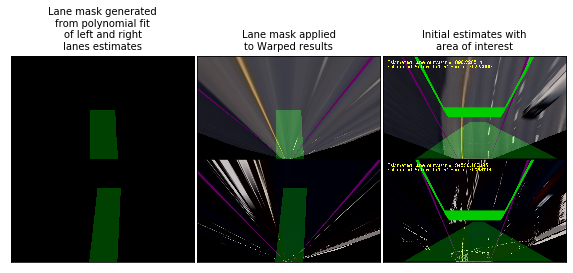

In [74]:
filepath = "test_images/"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'test*.jpg')

# Setup plot
fig = plt.figure(figsize=(10, len(images)*1.9))
w_ratios = [1 for n in range(3)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 3, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = 0

# loop through and display test images and apply current pipeline to them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_size = (img.shape[1], img.shape[0])
        
        # process image
        #img = cv2.undistort(img, mtx, dist, None, mtx)
        sky, ground, img0, img = process_image_stage1(img)
        img, line_image, masked_edges, lane_info, areaOfInterest = process_image(img0, debug=True)
        ignore_color = np.copy(line_image)*0 # creating a blank color channel for combining

        # generate estimated line image
        line_image = np.dstack((line_image, ignore_color, ignore_color))
        
        # masked overlay estimated lane line
        masked_edges = np.dstack((masked_edges, masked_edges, masked_edges))
        
        # just the image with the estimated lane line projection
        img1 = miximg(img, masked_edges)
        img1 = miximg(img1, line_image)
        draw_area_of_interest(img1, areaOfInterest, color=[0,128,0], thickness=5)

        # generate overlay line image
        img2 = np.copy(img)
        # img2 = weighted_img(masked_edges*2, img)
        #draw_area_of_interest_for_projection(img2, areaOfInterest, color=[0,128,0], thickness1=1, thickness2=50)
        #draw_parallel_lines_pre_projection(img2, lane_info, color=[128,0,0], thickness=2)
        
        # generate src and dst rects
        us_lane_width = 12     # US highway width: 12 feet wide
        approx_dest = 20       # Approximate distance to vanishing point from end of rectangle
        scale_factor = 15      # scaling for display
        left = -us_lane_width/2*scale_factor
        right = us_lane_width/2*scale_factor
        top = approx_dest * scale_factor
        src = np.float32([lane_info[3],lane_info[4],lane_info[5],lane_info[6]])
        dst = np.float32([[img_size[0]/2+left,top],[img_size[0]/2+right,top],[img_size[0]/2+right,img_size[1]],[img_size[0]/2+left,img_size[1]]])
        img2, M = unwarp_lane(img2, src, dst, mtx)

        img3 = np.copy(masked_edges)
        guide = np.copy(masked_edges)*0
        draw_parallel_lines_pre_projection(guide, lane_info, color=[128,128,0], thickness=50)
        img3, M = unwarp_lane(img3, src, dst, mtx)
        guide, M = unwarp_lane(guide, src, dst, mtx)
        guide = cv2.cvtColor(guide, cv2.COLOR_BGR2GRAY)
        img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
        
        # return left and right column positions
        left, right, distance = find_lane_locations(guide)

        # function to find lane lines points using a sliding window histogram given starting positions
        # return arrays or left, right and y positions
        leftx, rightx, yvals = find_lane_lines_points(img3, left, right, distance)
        
        # Fit a second order polynomial to each lane line
        if len(yvals)>0:
            leftcoefficients = np.polyfit(yvals, leftx, 2)
            leftpolynomial = np.poly1d(leftcoefficients)
            left_fitx = leftpolynomial(yvals)

            rightcoefficients = np.polyfit(yvals, rightx, 2)
            rightpolynomial = np.poly1d(rightcoefficients)
            right_fitx = rightpolynomial(yvals)
        
            rightxy = np.column_stack((right_fitx, yvals)).astype(np.int32)
            leftxy = np.column_stack((left_fitx, yvals)).astype(np.int32)
            roadpoly = np.concatenate((rightxy, leftxy[::-1]), axis=0)
            overlaymask = np.copy(ignore_color)
            cv2.fillConvexPoly(overlaymask, roadpoly, 64)
            overlaymask = np.dstack((ignore_color, overlaymask, ignore_color))
            img2 = miximg(img2, overlaymask)
        
            img4, M = unwarp_lane(overlaymask, dst, src, mtx)
            img4 = miximg(img, img4)
        
            left_curverad, right_curverad = radius_in_meters(leftx, rightx, yvals)
            est_road_curverad = (left_curverad+right_curverad)/2.0
        
            # meters from center
            screen_middel_pixel = img.shape[1]/2
            left_lane_pixel = lane_info[6][0]
            right_lane_pixel = lane_info[5][0]
            car_middle_pixel = int((right_lane_pixel + left_lane_pixel)/2)
            screen_off_center = screen_middel_pixel-car_middle_pixel
            meters_off_center = meters_from_center(screen_off_center)

            # using cv2 for drawing text in pipeline.
            font = cv2.FONT_HERSHEY_COMPLEX
            cv2.putText(img4, 'Estimated lane curvature: %f'%(est_road_curverad), (30, 60), font, 1, (255,255,0), 2)
            if meters_off_center>0:
                cv2.putText(img4, 'Estimated Meters right of center: %f'%(meters_off_center), (30, 90), font, 1, (255,255,0), 2)
            else:
                cv2.putText(img4, 'Estimated Meters left of center: %f'%(-meters_off_center), (30, 90), font, 1, (255,255,0), 2)
        else:
            overlaymask = np.copy(ignore_color)
            img4 = img
            cv2.putText(overlaymask, 'Failed to find lane lines.', (30, 90), font, 1, (255,255,0), 2)
        
        # next image
        ax = plt.Subplot(fig, grid[i])
        if i==0:
            ax.set_title('Lane mask generated\nfrom polynomial fit\nof left and right\nlanes estimates', size=10)
        ax.imshow(overlaymask)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1

        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img2)
        if i==1:
            ax.set_title('Lane mask applied\nto Warped results', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1

        # using plot at first for drawing text.
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img4)
        if i==2:
            ax.set_title('Initial estimates with\narea of interest', size=10)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1


In [76]:
# function to find lane lines points using a sliding window histogram given starting positions
# return arrays or left, right and y positions
"""
def find_lane_lines_points(masked_lines, leftpos, rightpos, distance, found=False):
    leftval = []
    rightval = []
    yval = []
    nrows = masked_lines.shape[0] - 1
    neighbors = 16
    if True:
        left1 = leftpos
        right1 = rightpos
        start_row = nrows-16
        for i in range(int((nrows/neighbors))):
            histogram = np.sum(masked_lines[start_row+10:start_row+26,:], axis=0).astype(np.uint8)
            left2, right2, leftx, rightx = find_lane_nearest_neighbors(histogram, left1, right1, int(neighbors*1.3))
            y = start_row + neighbors
            if len(leftx) < len(rightx):
                extra = len(rightx) - len(leftx)
                for i in range(len(rightx)):
                    rightval.append(rightx[i])
                    yval.append(y)
                for i in range(len(leftx)):
                    leftval.append(leftx[i])
                for i in range(extra):
                    leftval.append(rightx[i]-distance)
                if len(leftx) == 0 and not found:
                    distance -= 2
                    left1 = right2-distance
                else:
                    left1 = left2
                right1 = right2
            else:
                extra = len(leftx) - len(rightx)
                for i in range(len(leftx)):
                    leftval.append(leftx[i])
                    yval.append(y)
                for i in range(len(rightx)):
                    rightval.append(rightx[i])
                for i in range(extra):
                    rightval.append(leftx[i]+distance)
                if len(rightx) == 0 and not found:
                    distance -= 2
                    right1 = right2+distance
                else:
                    right1 = right2
                left1 = left2
         
            start_row -= neighbors
    return np.array(leftval), np.array(rightval), np.array(yval)
"""

# Final diagnostic pipeline
# Full suite of functions
# - distortion correction
# - detect lane pixels and fit to find lane boundary using:
# - Sobel Thresholds: AbsX, AbsY, Magnitude, and Directional
# - S and H Thresholds in HLS color space
# - Hough transform for initial estimate of line location
# - Road surface to planar projection
# - Histogram analysis to detect points in lane lines
# - Detected lane line points to 2nd degree polynomial fit to calculate line curvature
# - Calculate lane curvation in meters and vehicle distance from lane center
# - Create and render polygon mask for lane projection
# Rendered diagnostic screen on a 1920x1080 Full HD resolution
# - Main screen - 1280x720
#   + Undistorted picture with road projection overlay in green
# - Side screens (2x3) - 320x240
#   + Sobel AbsX/AbsY Thresholds
#   + Sobel Magnitude and Directional Thresholds
#   + S and H Thresholds
#   + Threshold Combinations
#   + Initial Lane Line from Hough transform and calculated area of interest
#   + Planar projection with Area of Interest
# - Bottom screens (3) - 640x480
#   + Planar projection with results from histogram and Polyfit
#   + Generated polygon mask
#   + Planar projection with polygon overlay
# - Middle screen (1) - 1920x120
#   + Diagnostic text area:
#     * Road curvature in meters
#     * Vehicle distance from center of Lane

def scatter_plot(img, x, y, color=(0,0,255), size=3):
    xy_array = np.column_stack((x, y)).astype(np.int32)
    for xy in xy_array:
        cv2.circle(img, (xy[0], xy[1]), size, color, -1)

def diagnostic_process_image(img, found=False, plane_info=None, proadmask=None, level=0):
    img_size = (img.shape[1], img.shape[0])
    #image = cv2.undistort(img, mtx, dist, None, mtx)
    sky, ground, image, img = process_image_stage1(img)
    

    # mask calculations
    imshape = image.shape
    xbottom1 = int(imshape[1]/16)
    xbottom2 = int(imshape[1]*15/16)
    xtop1 = int(imshape[1]*14/32)
    xtop2 = int(imshape[1]*18/32)
    ybottom1 = imshape[0]
    ybottom2 = imshape[0]
    ytopbox = int(imshape[0]*9/16)

    # Run the functions
    gradx = abs_sobel_thresh(image, orient='x', thresh=(25, 100))
    grady = abs_sobel_thresh(image, orient='y', thresh=(50, 150))
    magch = mag_thresh(image, sobel_kernel=9, mag_thresh=(50, 250))
    dirch = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
    sch = hls_s(image, thresh=(88, 190))
    hch = hls_h(image, thresh=(50, 100))

    # Output "masked_lines" is a single channel mask
    shadow = np.zeros_like(dirch).astype(np.uint8)
    shadow[(sch > 0) & (hch > 0)] = 128

    # remove the green pixels!
    ignore_green = np.zeros_like(dirch).astype(np.uint8)
    ignore_green[(grady > 75) & (magch > 125)] = 128

    rEdgeDetect = ((img[:,:,0]/4)).astype(np.uint8)
    rEdgeDetect = 255-rEdgeDetect
    rEdgeDetect[(rEdgeDetect>210)] = 0

    # create diagnostic screen 1-3
    ignore_color = np.copy(gradx)*0 # creating a blank color channel for combining
    diag1 = np.dstack((rEdgeDetect, gradx, grady))
    diag2 = np.dstack((ignore_color, magch, dirch))
    diag3 = np.dstack((sch, sch, hch))

    # create diagnostic screen 4
    combined = np.zeros_like(dirch).astype(np.uint8)
    combined[((gradx > 0) | (grady > 0) | ((magch > 0) & (dirch > 0)) | (sch > 0)) & (shadow == 0) & (rEdgeDetect>0)] = 35

    if found:
        proadmask[(combined==0)] = 0
        diag4 = np.dstack((proadmask, proadmask, proadmask))
    else:
        diag4 = np.dstack((combined, combined, combined))

    # This time we are defining a four sided polygon to mask
    # We can lift the mask higher now, since the line drawing function is a bit smarter
    vertices = np.array([[(xbottom1,ybottom1),(xtop1, ytopbox), (xtop2, ytopbox), (xbottom2,ybottom2)]], dtype=np.int32)
    if found:
        masked_edges = region_of_interest(proadmask, vertices)
    else:
        masked_edges = region_of_interest(combined, vertices)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 40     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 75 #minimum number of pixels making up a line
    max_line_gap = 50    # maximum gap in pixels between connectable line segments

    # generate hough lines estimates of lane lines
    if not found:
        color = (255,255,0)
        line_image_mask, lane_info = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)
        plane_info = lane_info        
    else:
        color = (0, 255, 0)
        masked_edges[(masked_edges > 0)&(proadmask == 0)] = 0
        line_image_mask, lane_info = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)
        if lane_info[0] > 0:
            plane_info = lane_info
        else:
            lane_info = plane_info
            line_image_mask = proadmask

    # calculate the area of interest, this will be used later to reproject just the lanes that needs advance finding
    areaOfInterest = np.array([[(plane_info[3][0]-50,plane_info[3][1]-11),(plane_info[4][0]+50,plane_info[4][1]-11), (plane_info[4][0]+525,plane_info[4][1]+75), (plane_info[4][0]+500,plane_info[5][1]-25), (plane_info[4][0]-500,plane_info[6][1]-25), (plane_info[3][0]-525,plane_info[3][1]+75)]], dtype=np.int32)

    # generate estimated line image
    line_image = np.dstack((line_image_mask, ignore_color, ignore_color))
        
    # masked overlay estimated lane line
    masked_edges_purple = np.dstack((masked_edges, ignore_color, masked_edges))
    masked_edges = np.dstack((masked_edges, masked_edges, masked_edges))
        
    # just the image with the estimated lane line projection
    diag5 = miximg(image, masked_edges)
    diag5 = miximg(diag5, line_image)
    draw_area_of_interest(diag5, areaOfInterest, color=[0,128,0], thickness=5)
    leftbound  = int(plane_info[7][0]-(imshape[1]*0.1))
    rightbound = int(plane_info[7][0]+(imshape[1]*0.1))
    topbound =  int(plane_info[7][1]-(imshape[0]*0.15))
    bottombound = int(plane_info[7][1]+(imshape[0]*0.05))
    boundingbox = (leftbound-2,topbound-2,rightbound+2,bottombound+2)
    draw_bounding_box(diag5, boundingbox)
        
    # generate src and dst rects for projection of road to flat plane
    us_lane_width = 12     # US highway width: 12 feet wide
    approx_dest = 20       # Approximate distance to vanishing point from end of rectangle
    scale_factor = 15      # scaling for display
    left = -us_lane_width/2*scale_factor
    right = us_lane_width/2*scale_factor
    top = approx_dest * scale_factor
    src = np.float32([lane_info[3],lane_info[4],lane_info[5],lane_info[6]])
    dst = np.float32([[img_size[0]/2+left,top],[img_size[0]/2+right,top],[img_size[0]/2+right,img_size[1]],[img_size[0]/2+left,img_size[1]]])

    # generate overlay line image
    diag6 = miximg(image, masked_edges_purple*4)
    draw_area_of_interest_for_projection(diag6, areaOfInterest, color=[0,128,0], thickness1=1, thickness2=50)
    draw_parallel_lines_pre_projection(diag6, lane_info, color=[128,0,0], thickness=2)
    diag6, M = unwarp_lane(diag6, src, dst, mtx)

    # generate 
    diag7 = np.copy(masked_edges)
    guide = np.copy(masked_edges)*0
    draw_parallel_lines_pre_projection(guide, lane_info, color=[128,128,0], thickness=50)
    diag7, M = unwarp_lane(diag7, src, dst, mtx)
    guide, M = unwarp_lane(guide, src, dst, mtx)
    guide = cv2.cvtColor(guide, cv2.COLOR_BGR2GRAY)
    projected_lane_lines = cv2.cvtColor(diag7, cv2.COLOR_BGR2GRAY)
        
    # return left and right column positions
    left, right, distance = find_lane_locations(guide)

    # function to find lane lines points using a sliding window histogram given starting positions
    # return arrays or left, right and y positions
    leftx, rightx, yvals = find_lane_lines_points(projected_lane_lines, left, right, distance, found)
        


In [77]:
# Make a list of test images
filepath = "test_images/"
pattern = re.compile("^.+processed.jpg$")
images = glob.glob(filepath+'test*.jpg')

# Setup plot
fig = plt.figure(figsize=(12, len(images)*7))
w_ratios = [32]
h_ratios = [18 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 1, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = 0

# loop through and display test images and apply current pipeline to them
for idx, fname in enumerate(images):
    # import the image if it is not a saved output
    if not pattern.match(fname):
        plane_info = None
        projected_road_mask = None
        found = False
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        diagScreen, found, plane_info, projected_road_mask = diagnostic_process_image(img, found, plane_info, projected_road_mask)
        # next image
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(diagScreen)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1


TypeError: cannot unpack non-iterable NoneType object

<Figure size 864x3024 with 0 Axes>

In [81]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [82]:
def process_diagnostic_image(image):
    global found
    global plane_info
    global projected_roadmask
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    result, found, plane_info, projected_roadmask = diagnostic_process_image(image, found, plane_info, projected_roadmask)
    return result

In [83]:
found = False
plane_info = None
projected_roadmask = None
videoout = 'project_video_diagnostics2.mp4'
clip1 = VideoFileClip("project_video.mp4")
video_clip = clip1.fl_image(process_diagnostic_image) #NOTE: this function expects color images!!
%time video_clip.write_videofile(videoout, audio=False)

TypeError: cannot unpack non-iterable NoneType object